# Monnit Data

---

## 1. Import Required Libraries

In [43]:
# Import Required Libraries with Error Handling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import warnings
from collections import defaultdict
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# Optional imports with fallbacks
try:
    import seaborn as sns
    sns.set_palette("husl")
    SEABORN_AVAILABLE = True
    print("✓ Seaborn imported successfully")
except ImportError:
    SEABORN_AVAILABLE = False
    print("Seaborn not available - using matplotlib defaults")

try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("Plotly imported successfully")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("Plotly not available - using matplotlib for all visualizations")

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("\n Package Status:")
print(f"✓ Core libraries: pandas, matplotlib, numpy - Ready")
print(f"{'✓' if SEABORN_AVAILABLE else '⚠️'} Seaborn: {'Available' if SEABORN_AVAILABLE else 'Not installed'}")
print(f"{'✓' if PLOTLY_AVAILABLE else '⚠️'} Plotly: {'Available' if PLOTLY_AVAILABLE else 'Not installed'}")

if not SEABORN_AVAILABLE or not PLOTLY_AVAILABLE:
    print("\n To install missing packages, run:")
    if not SEABORN_AVAILABLE:
        print("   pip install seaborn")
    if not PLOTLY_AVAILABLE:
        print("   pip install plotly")
    print("\nThe analysis will continue using available libraries.")

print(f"\n Library Versions:")
print(f"  - Pandas: {pd.__version__}")
print(f"  - Matplotlib: {plt.matplotlib.__version__}")
print(f"  - NumPy: {np.__version__}")
if SEABORN_AVAILABLE:
    print(f"  - Seaborn: {sns.__version__}")
else:
    print("  - Seaborn: Not installed")
print("\n Ready to analyze Monnit sensor data!")

✓ Seaborn imported successfully
Plotly imported successfully

 Package Status:
✓ Core libraries: pandas, matplotlib, numpy - Ready
✓ Seaborn: Available
✓ Plotly: Available

 Library Versions:
  - Pandas: 2.3.0
  - Matplotlib: 3.10.3
  - NumPy: 2.3.0
  - Seaborn: 0.13.2

 Ready to analyze Monnit sensor data!


## 2. Load and Explore Sensor Data

In [44]:
# Load CSV data with robust error handling
csv_path = r"Monnit data - devices-report-batt-signal.csv"  # Update path as needed

print("Loading Monnit sensor data...")
try:
    df = pd.read_csv(csv_path)
    print(f"✓ Data loaded successfully!")
    print(f"  - Shape: {df.shape}")
    print(f"  - Columns: {len(df.columns)}")
    print(f"  - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Check for unnamed first column and remove if exists
    if df.columns[0].startswith('Unnamed'):
        df = df.drop(columns=df.columns[0])
        print(f"  - Removed unnamed first column")
    
    # Show actual column names for debugging
    print(f"\n Column names (first 10):")
    for i, col in enumerate(df.columns[:10]):
        print(f"  {i}: '{col}'")
    
except FileNotFoundError:
    print(" File not found. Please update the csv_path variable with the correct path.")
    print("Current path:", csv_path)
    print("\n Make sure the CSV file is in the same folder as this notebook, or provide the full path.")

# Display basic data info
if 'df' in locals():
    print("\n Data Overview:")
    print(df.head(3))
else:
    print(" DataFrame not loaded - please check the file path and try again.")

Loading Monnit sensor data...
✓ Data loaded successfully!
  - Shape: (3098, 121)
  - Columns: 121
  - Memory usage: 18.55 MB
  - Removed unnamed first column

 Column names (first 10):
  0: 'Unnamed: 1'
  1: 'Unnamed: 2'
  2: 'Unnamed: 3'
  3: 'Unnamed: 4'
  4: 'Unnamed: 5'
  5: 'Unnamed: 6'
  6: 'Unnamed: 7'
  7: 'Unnamed: 8'
  8: 'Unnamed: 9'
  9: 'Unnamed: 10'

 Data Overview:
      Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0  Temperature 1  Battery 1   Signal 1  Temperature 2  Battery 2   Signal 2   
1          23.79       3.03         55          23.06       3.03         71   
2          23.79       3.03         55          23.06       3.03         71   

      Unnamed: 7 Unnamed: 8 Unnamed: 9    Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0  Temperature 3  Battery 3   Signal 3  Temperature 4   Battery 4    Signal 4   
1          22.79       3.02         65          22.55        3.04          66   
2          22.79       3.02         65          22.55    

In [45]:
# Enhanced CSV Loading with Multiple Path Options
import os

# Try multiple possible file paths
possible_paths = [
    r"Monnit data - devices-report-batt-signal.csv",  # Same directory
    r".\Monnit data - devices-report-batt-signal.csv",  # Current directory explicit
    r"..\Monnit data - devices-report-batt-signal.csv",  # Parent directory
    r"c:\Users\John Christian\Desktop\data interpre\Monnit data - devices-report-batt-signal.csv",  # Full path
    r"data\Monnit data - devices-report-batt-signal.csv",  # Data subdirectory
]

# Also check for similar filenames
current_dir = os.getcwd()
print(f" Current working directory: {current_dir}")
print("\n Searching for CSV file...")

# List all CSV files in current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
if csv_files:
    print(f"\n CSV files found in current directory:")
    for i, csv_file in enumerate(csv_files):
        print(f"  {i+1}. {csv_file}")

csv_path = None
df = None

# Try each possible path
for path in possible_paths:
    if os.path.exists(path):
        csv_path = path
        print(f"\n✓ Found CSV file: {path}")
        break

# If not found automatically, try the files we found
if csv_path is None and csv_files:
    # Look for files containing "monnit" or "device" (case insensitive)
    for csv_file in csv_files:
        if any(keyword in csv_file.lower() for keyword in ['monnit', 'device', 'sensor', 'battery', 'signal']):
            csv_path = csv_file
            print(f"\n Auto-selected likely file: {csv_file}")
            break
    
    # If still not found, use the first CSV file as fallback
    if csv_path is None:
        csv_path = csv_files[0]
        print(f"\n Using first available CSV file: {csv_files[0]}")

if csv_path:
    try:
        print(f"\n Loading: {csv_path}")
        df = pd.read_csv(csv_path)
        print(f"✓ Data loaded successfully!")
        print(f"  - Shape: {df.shape}")
        print(f"  - Columns: {len(df.columns)}")
        print(f"  - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Check for unnamed first column and remove if exists
        if len(df.columns) > 0 and str(df.columns[0]).startswith('Unnamed'):
            df = df.drop(columns=df.columns[0])
            print(f"  - Removed unnamed first column")
        
        # Show actual column names for debugging
        print(f"\n Column names (first 10):")
        for i, col in enumerate(df.columns[:10]):
            print(f"  {i}: '{col}'")
        
        # Display basic data info
        print("\n Data Overview:")
        print(df.head(3))
            
    except Exception as e:
        print(f" Error loading CSV file: {e}")
        df = None
        
else:
    print(" No CSV file found!")
    print("\n Solutions:")
    print("1. Make sure the CSV file is in the same folder as this notebook")
    print("2. Check the exact filename (case-sensitive)")
    print("3. Update the csv_path variable with the correct full path")
    print("4. Upload the CSV file to the current directory")
    
    # Manual path input option
    print(f"\n Manual Path Entry:")
    print("If you know the exact path, update this line:")
    print('csv_path = r"YOUR_FULL_PATH_HERE"')
    print("Then run: df = pd.read_csv(csv_path)")

 Current working directory: c:\Users\John Christian\Desktop\data interpre

 Searching for CSV file...

 CSV files found in current directory:
  1. Monnit data - devices-report-batt-signal.csv

✓ Found CSV file: Monnit data - devices-report-batt-signal.csv

 Loading: Monnit data - devices-report-batt-signal.csv
✓ Data loaded successfully!
  - Shape: (3098, 121)
  - Columns: 121
  - Memory usage: 18.55 MB
  - Removed unnamed first column

 Column names (first 10):
  0: 'Unnamed: 1'
  1: 'Unnamed: 2'
  2: 'Unnamed: 3'
  3: 'Unnamed: 4'
  4: 'Unnamed: 5'
  5: 'Unnamed: 6'
  6: 'Unnamed: 7'
  7: 'Unnamed: 8'
  8: 'Unnamed: 9'
  9: 'Unnamed: 10'

 Data Overview:
      Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0  Temperature 1  Battery 1   Signal 1  Temperature 2  Battery 2   Signal 2   
1          23.79       3.03         55          23.06       3.03         71   
2          23.79       3.03         55          23.06       3.03         71   

      Unnamed: 7 U

In [46]:
# Fix CSV Loading - Use First Row as Headers
print(" Fixing CSV column headers...")

if csv_path and os.path.exists(csv_path):
    try:
        print(f" Re-loading with proper headers: {csv_path}")
        
        # Load with first row as headers (header=0 is default, but let's be explicit)
        df = pd.read_csv(csv_path, header=0)
        
        # If that still gives unnamed columns, the headers might be in row 1
        if any('Unnamed' in str(col) for col in df.columns[:5]):
            print("  First attempt failed, trying header=1...")
            df = pd.read_csv(csv_path, header=1)
        
        # If still unnamed, try without headers and set manually
        if any('Unnamed' in str(col) for col in df.columns[:5]):
            print("  Second attempt failed, checking actual data structure...")
            temp_df = pd.read_csv(csv_path, header=None, nrows=3)
            print("  First few rows:")
            print(temp_df.iloc[:3, :10])  # Show first 3 rows, 10 columns
            
            # Check if first row contains column names
            first_row = temp_df.iloc[0].tolist()
            if any(isinstance(val, str) and 'Temperature' in str(val) for val in first_row[:10]):
                print("  Found headers in first data row, using as column names...")
                df = pd.read_csv(csv_path, header=None)
                df.columns = df.iloc[0]  # Use first row as headers
                df = df.drop(df.index[0]).reset_index(drop=True)  # Remove header row from data
            
        print(f" Data re-loaded successfully!")
        print(f"  - Shape: {df.shape}")
        print(f"  - Columns: {len(df.columns)}")
        
        # Show actual column names for debugging
        print(f"\n Column names (first 10):")
        for i, col in enumerate(df.columns[:10]):
            print(f"  {i}: '{col}'")
        
        # Check for and remove unnamed first column if it exists
        if len(df.columns) > 0 and str(df.columns[0]).startswith('Unnamed'):
            df = df.drop(columns=df.columns[0])
            print(f"  - Removed unnamed first column")
        
        # Display basic data info
        print("\n Data Overview:")
        print(df.head(3))
            
    except Exception as e:
        print(f" Error re-loading CSV file: {e}")
        df = None
        
else:
    print(" No CSV file path available!")

 Fixing CSV column headers...
 Re-loading with proper headers: Monnit data - devices-report-batt-signal.csv
  First attempt failed, trying header=1...
 Data re-loaded successfully!
  - Shape: (3097, 121)
  - Columns: 121

 Column names (first 10):
  0: 'time'
  1: 'Temperature 1'
  2: 'Battery 1'
  3: 'Signal 1'
  4: 'Temperature 2'
  5: 'Battery 2'
  6: 'Signal 2'
  7: 'Temperature 3'
  8: 'Battery 3'
  9: 'Signal 3'

 Data Overview:
                       time  Temperature 1  Battery 1  Signal 1  \
0  September 11, 2025 15:23          23.79       3.03        55   
1  September 11, 2025 15:24          23.79       3.03        55   
2  September 11, 2025 15:25          23.79       3.03        55   

   Temperature 2  Battery 2  Signal 2  Temperature 3  Battery 3  Signal 3  \
0          23.06       3.03        71          22.79       3.02        65   
1          23.06       3.03        71          22.79       3.02        65   
2          23.06       3.03        71          22.79       3.

In [47]:
# Analyze data structure with error handling
if 'df' not in locals() or df is None:
    print(" No data loaded. Please run the data loading cell first.")
else:
    print(" Data Structure Analysis:")
    print(f"Columns: {list(df.columns)[:10]}...")  # Show first 10 columns
    print(f"Total columns: {len(df.columns)}")
    print(f"\nColumn patterns detected:")

    # Identify device columns
    device_numbers = []
    temp_cols = [col for col in df.columns if col.startswith('Temperature')]
    batt_cols = [col for col in df.columns if col.startswith('Battery')]
    signal_cols = [col for col in df.columns if col.startswith('Signal')]

    for col in temp_cols:
        try:
            device_num = int(col.split(' ')[1])
            device_numbers.append(device_num)
        except (IndexError, ValueError):
            pass

    device_numbers = sorted(list(set(device_numbers)))
    print(f"  - Temperature columns: {len(temp_cols)}")
    print(f"  - Battery columns: {len(batt_cols)}")
    print(f"  - Signal columns: {len(signal_cols)}")
    print(f"  - Detected device numbers: {device_numbers[:10]}..." if len(device_numbers) > 10 else f"  - Detected device numbers: {device_numbers}")
    print(f"  - Total devices: {len(device_numbers)}")

    # Check time column
    print(f"\n Time Analysis:")
    if 'time' in df.columns:
        print(f"  - Time column found and processed")
        print(f"  - Sample time values: {df['time'].iloc[:3].tolist()}")
    else:
        print("  - No 'time' column found after preprocessing")
        # Look for potential time columns
        time_candidates = [col for col in df.columns if any(keyword in col.lower() for keyword in ['time', 'date', 'timestamp'])]
        if time_candidates:
            print(f"  - Potential time columns: {time_candidates}")
        else:
            print(f"  - First column (might be time): '{df.columns[0]}' = {df.iloc[0, 0]}")

    if len(device_numbers) == 0:
        print(f"\n No device columns detected!")
        print(f"Available columns: {list(df.columns)}")
        print("\n Expected column format: 'Temperature 1', 'Battery 1', 'Signal 1', etc.")
    else:
        print(f"\n Successfully detected {len(device_numbers)} devices")

 Data Structure Analysis:
Columns: ['time', 'Temperature 1', 'Battery 1', 'Signal 1', 'Temperature 2', 'Battery 2', 'Signal 2', 'Temperature 3', 'Battery 3', 'Signal 3']...
Total columns: 121

Column patterns detected:
  - Temperature columns: 40
  - Battery columns: 40
  - Signal columns: 40
  - Detected device numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]...
  - Total devices: 40

 Time Analysis:
  - Time column found and processed
  - Sample time values: ['September 11, 2025 15:23', 'September 11, 2025 15:24', 'September 11, 2025 15:25']

 Successfully detected 40 devices


## 3. Data Preprocessing and Validation

In [48]:
# Data Preprocessing and Cleaning with Error Handling
print("Data Preprocessing:")

# Check if DataFrame exists
if 'df' not in locals() or df is None:
    print(" No data loaded. Please run the data loading cell first.")
else:
    print(f" DataFrame available with shape: {df.shape}")
    
    # Look for time column (handle different possible names)
    time_col = None
    possible_time_cols = ['time', 'Time', 'timestamp', 'Timestamp', 'datetime', 'DateTime']
    
    for col in possible_time_cols:
        if col in df.columns:
            time_col = col
            break
    
    # If no standard time column found, check first column
    if time_col is None and len(df.columns) > 0:
        first_col = df.columns[0]
        # Check if first column looks like time data
        if df[first_col].dtype == 'object':
            sample_val = str(df[first_col].iloc[0])
            if any(month in sample_val for month in ['January', 'February', 'March', 'April', 'May', 'June',
                                                   'July', 'August', 'September', 'October', 'November', 'December']):
                time_col = first_col
                print(f"  Detected time column as: '{time_col}'")
    
    if time_col:
        print(f"   Time column found: '{time_col}'")
        
        # Convert time column to datetime
        try:
            df['time'] = pd.to_datetime(df[time_col], format='%B %d, %Y %H:%M', errors='coerce')
            
            # If that failed, try other common formats
            if df['time'].isna().all():
                df['time'] = pd.to_datetime(df[time_col], errors='coerce')
            
            # Remove original time column if it's different from 'time'
            if time_col != 'time':
                df = df.drop(columns=[time_col])
            
            df = df.sort_values('time').reset_index(drop=True)
            
            print(f"   Time column converted to datetime")
            print(f"  - Date range: {df['time'].min()} to {df['time'].max()}")
            print(f"  - Total duration: {(df['time'].max() - df['time'].min()).days} days")
            print(f"  - Records: {len(df)}")
            
        except Exception as e:
            print(f"   Error converting time column: {e}")
            print(f"  Sample values: {df[time_col].iloc[:3].tolist()}")
    else:
        print("  No time column found!")
        print(f"  Available columns: {list(df.columns)[:10]}...")

    # Define analysis thresholds and parameters
    BATTERY_LOW_THRESHOLD = 2.9
    BATTERY_CRITICAL_THRESHOLD = 2.8  
    SIGNAL_POOR_THRESHOLD = 20

    print(f"\n Analysis Parameters:")
    print(f"  - Battery Low Threshold: ≤ {BATTERY_LOW_THRESHOLD}V")
    print(f"  - Battery Critical Threshold: ≤ {BATTERY_CRITICAL_THRESHOLD}V")
    print(f"  - Signal Poor Threshold: < {SIGNAL_POOR_THRESHOLD}%")

    # Check if we have device data columns
    if 'device_numbers' in locals() and len(device_numbers) > 0:
        print(f"  - Total Devices to Analyze: {len(device_numbers)}")
        
        # Store global variables for analysis
        analysis_config = {
            'device_numbers': device_numbers,
            'battery_low': BATTERY_LOW_THRESHOLD,
            'battery_critical': BATTERY_CRITICAL_THRESHOLD,
            'signal_poor': SIGNAL_POOR_THRESHOLD,
            'temp_cols': temp_cols if 'temp_cols' in locals() else [],
            'batt_cols': batt_cols if 'batt_cols' in locals() else [],
            'signal_cols': signal_cols if 'signal_cols' in locals() else []
        }
        
        print("  Configuration stored successfully")
    else:
        print("  No device columns detected yet - run data structure analysis first")

Data Preprocessing:
 DataFrame available with shape: (3097, 121)
   Time column found: 'time'
   Time column converted to datetime
  - Date range: 2025-09-11 15:23:00 to 2025-09-30 11:15:00
  - Total duration: 18 days
  - Records: 3097

 Analysis Parameters:
  - Battery Low Threshold: ≤ 2.9V
  - Battery Critical Threshold: ≤ 2.8V
  - Signal Poor Threshold: < 20%
  - Total Devices to Analyze: 40
  Configuration stored successfully
   Time column converted to datetime
  - Date range: 2025-09-11 15:23:00 to 2025-09-30 11:15:00
  - Total duration: 18 days
  - Records: 3097

 Analysis Parameters:
  - Battery Low Threshold: ≤ 2.9V
  - Battery Critical Threshold: ≤ 2.8V
  - Signal Poor Threshold: < 20%
  - Total Devices to Analyze: 40
  Configuration stored successfully


In [49]:
# Data Quality Assessment
print(" Data Quality Assessment:")

# Check for missing values and zeros
missing_summary = {}
zero_summary = {}

for device_num in device_numbers[:5]:  # Check first 5 devices as sample
    temp_col = f'Temperature {device_num}'
    batt_col = f'Battery {device_num}'
    signal_col = f'Signal {device_num}'
    
    if temp_col in df.columns:
        missing_summary[f'Device {device_num}'] = {
            'temp_missing': df[temp_col].isna().sum(),
            'temp_zeros': (df[temp_col] == 0).sum(),
            'batt_missing': df[batt_col].isna().sum() if batt_col in df.columns else 0,
            'batt_zeros': (df[batt_col] == 0).sum() if batt_col in df.columns else 0,
            'signal_missing': df[signal_col].isna().sum() if signal_col in df.columns else 0,
            'signal_zeros': (df[signal_col] == 0).sum() if signal_col in df.columns else 0,
        }

# Display summary for sample devices
sample_df = pd.DataFrame(missing_summary).T
print("\nSample Data Quality (First 5 Devices):")
print(sample_df)

# Basic statistics for first device
if len(device_numbers) > 0:
    first_device = device_numbers[0]
    temp_col = f'Temperature {first_device}'
    batt_col = f'Battery {first_device}'
    signal_col = f'Signal {first_device}'
    
    print(f"\n Sample Statistics (Device {first_device}):")
    if temp_col in df.columns:
        valid_temp = df[temp_col][df[temp_col] > 0]
        valid_batt = df[batt_col][df[batt_col] > 0] if batt_col in df.columns else pd.Series()
        valid_signal = df[signal_col][df[signal_col] > 0] if signal_col in df.columns else pd.Series()
        
        if len(valid_temp) > 0:
            print(f"  Temperature: {valid_temp.min():.1f}°C - {valid_temp.max():.1f}°C (mean: {valid_temp.mean():.1f}°C)")
        if len(valid_batt) > 0:
            print(f"  Battery: {valid_batt.min():.2f}V - {valid_batt.max():.2f}V (mean: {valid_batt.mean():.2f}V)")
        if len(valid_signal) > 0:
            print(f"  Signal: {valid_signal.min():.0f}% - {valid_signal.max():.0f}% (mean: {valid_signal.mean():.0f}%)")

 Data Quality Assessment:

Sample Data Quality (First 5 Devices):
          temp_missing  temp_zeros  batt_missing  batt_zeros  signal_missing  \
Device 1             0          14             0          14               0   
Device 2             0          14             0          14               0   
Device 3             0          14             0          14               0   
Device 4             0          14             0          14               0   
Device 5             0          14             0          14               0   

          signal_zeros  
Device 1            14  
Device 2            14  
Device 3            14  
Device 4            14  
Device 5            14  

 Sample Statistics (Device 1):
  Temperature: 19.3°C - 24.6°C (mean: 22.5°C)
  Battery: 3.00V - 3.04V (mean: 3.03V)
  Signal: 12% - 89% (mean: 52%)


## 4. Device Failure Detection Functions

In [50]:
def get_device_data(device_num, df):
    """Extract clean data for a specific device."""
    temp_col = f'Temperature {device_num}'
    batt_col = f'Battery {device_num}'
    signal_col = f'Signal {device_num}'
    
    # Create device dataframe
    device_data = df[['time', temp_col, batt_col, signal_col]].copy()
    device_data.columns = ['time', 'temperature', 'battery', 'signal']
    
    # Convert zeros to NaN for better analysis (zeros typically mean no reading)
    device_data.loc[device_data['temperature'] == 0, 'temperature'] = np.nan
    device_data.loc[device_data['battery'] == 0, 'battery'] = np.nan  
    device_data.loc[device_data['signal'] == 0, 'signal'] = np.nan
    
    return device_data

def detect_device_failure(device_num, df, config):
    """Detect when and how a device failed."""
    device_data = get_device_data(device_num, df)
    
    # Find last valid readings for each sensor type
    temp_valid = device_data.dropna(subset=['temperature'])
    batt_valid = device_data.dropna(subset=['battery']) 
    signal_valid = device_data.dropna(subset=['signal'])
    
    failure_info = {
        'device_num': device_num,
        'status': 'active',
        'last_temp_time': None,
        'last_battery_time': None, 
        'last_signal_time': None,
        'failure_time': None,
        'battery_at_failure': None,
        'signal_at_failure': None,
        'probable_cause': 'Unknown',
        'cause_confidence': 'Low'
    }
    
    # Check if device ever reported
    if len(temp_valid) == 0:
        failure_info['status'] = 'never_active'
        return failure_info
    
    # Get last reading times and values
    if len(temp_valid) > 0:
        failure_info['last_temp_time'] = temp_valid.iloc[-1]['time']
        
    if len(batt_valid) > 0:
        failure_info['last_battery_time'] = batt_valid.iloc[-1]['time'] 
        failure_info['battery_at_failure'] = batt_valid.iloc[-1]['battery']
        
    if len(signal_valid) > 0:
        failure_info['last_signal_time'] = signal_valid.iloc[-1]['time']
        failure_info['signal_at_failure'] = signal_valid.iloc[-1]['signal']
    
    # Determine if device has failed (stopped reporting temperature)
    max_time = df['time'].max()
    if len(temp_valid) > 0 and temp_valid.iloc[-1]['time'] < max_time:
        failure_info['status'] = 'failed'
        failure_info['failure_time'] = temp_valid.iloc[-1]['time']
        
        # Determine probable failure cause
        battery_level = failure_info['battery_at_failure']
        signal_level = failure_info['signal_at_failure'] 
        
        # Classification logic
        if battery_level and battery_level <= config['battery_critical']:
            failure_info['probable_cause'] = 'Critical Low Battery (≤2.8V)'
            failure_info['cause_confidence'] = 'High'
        elif battery_level and battery_level <= config['battery_low']:
            failure_info['probable_cause'] = 'Low Battery (≤2.9V)' 
            failure_info['cause_confidence'] = 'Medium'
        elif signal_level and signal_level < config['signal_poor']:
            failure_info['probable_cause'] = 'Poor Signal (<20%)'
            failure_info['cause_confidence'] = 'Medium'
        else:
            # Check for signal drop pattern
            if len(signal_valid) >= 3:
                recent_signals = signal_valid.tail(3)['signal'].values
                if len(recent_signals) >= 2 and recent_signals[-1] < recent_signals[0] * 0.6:
                    failure_info['probable_cause'] = 'Signal Drop Before Failure'
                    failure_info['cause_confidence'] = 'Medium'
                else:
                    failure_info['probable_cause'] = 'Gateway/Connectivity Issue'
                    failure_info['cause_confidence'] = 'Low'
            else:
                failure_info['probable_cause'] = 'Gateway/Connectivity Issue'
                failure_info['cause_confidence'] = 'Low'
    
    return failure_info

# Test the function with first device
if len(device_numbers) > 0:
    test_device = device_numbers[0]
    test_result = detect_device_failure(test_device, df, analysis_config)
    
    print(f" Test Analysis - Device {test_device}:")
    for key, value in test_result.items():
        print(f"  {key}: {value}")
else:
    print(" No devices found for testing")

 Test Analysis - Device 1:
  device_num: 1
  status: active
  last_temp_time: 2025-09-30 11:15:00
  last_battery_time: 2025-09-30 11:15:00
  last_signal_time: 2025-09-30 11:15:00
  failure_time: None
  battery_at_failure: 3.03
  signal_at_failure: 55.0
  probable_cause: Unknown
  cause_confidence: Low


## 5. Per-Device Analysis

In [51]:
# Analyze All Devices
print(" Analyzing all devices for failures...")

device_failures = {}
failed_devices = []
active_devices = []
never_active_devices = []

# Progress tracking
total_devices = len(device_numbers)
print(f"Processing {total_devices} devices...")

for i, device_num in enumerate(device_numbers):
    if i % 10 == 0:  # Progress update every 10 devices
        print(f"  Progress: {i}/{total_devices} devices analyzed...")
        
    failure_info = detect_device_failure(device_num, df, analysis_config)
    device_failures[device_num] = failure_info
    
    # Categorize devices
    if failure_info['status'] == 'failed':
        failed_devices.append(device_num)
    elif failure_info['status'] == 'active':
        active_devices.append(device_num)
    elif failure_info['status'] == 'never_active':
        never_active_devices.append(device_num)

print(f"\n Analysis Complete!")
print(f" Device Status Summary:")
print(f"  - Active Devices: {len(active_devices)}")
print(f"  - Failed Devices: {len(failed_devices)}")  
print(f"  - Never Active: {len(never_active_devices)}")
print(f"  - Total Analyzed: {len(device_failures)}")

# Display failed devices summary
if failed_devices:
    print(f"\n Failed Devices ({len(failed_devices)}):")
    for device_num in failed_devices[:10]:  # Show first 10 failed devices
        info = device_failures[device_num]
        print(f"  Device {device_num}: {info['probable_cause']} (Failed: {info['failure_time']})")
    
    if len(failed_devices) > 10:
        print(f"  ... and {len(failed_devices) - 10} more failed devices")
        
# Store results globally
analysis_results = {
    'device_failures': device_failures,
    'failed_devices': failed_devices,
    'active_devices': active_devices, 
    'never_active_devices': never_active_devices
}

 Analyzing all devices for failures...
Processing 40 devices...
  Progress: 0/40 devices analyzed...
  Progress: 10/40 devices analyzed...
  Progress: 20/40 devices analyzed...
  Progress: 30/40 devices analyzed...
  Progress: 10/40 devices analyzed...
  Progress: 20/40 devices analyzed...
  Progress: 30/40 devices analyzed...

 Analysis Complete!
 Device Status Summary:
  - Active Devices: 21
  - Failed Devices: 17
  - Never Active: 2
  - Total Analyzed: 40

 Failed Devices (17):
  Device 6: Gateway/Connectivity Issue (Failed: 2025-09-29 15:45:00)
  Device 7: Gateway/Connectivity Issue (Failed: 2025-09-26 07:45:00)
  Device 11: Gateway/Connectivity Issue (Failed: 2025-09-29 15:45:00)
  Device 13: Gateway/Connectivity Issue (Failed: 2025-09-29 15:45:00)
  Device 17: Poor Signal (<20%) (Failed: 2025-09-19 13:45:00)
  Device 18: Poor Signal (<20%) (Failed: 2025-09-29 15:45:00)
  Device 26: Gateway/Connectivity Issue (Failed: 2025-09-19 13:45:00)
  Device 28: Gateway/Connectivity Issue (F

## 6. Battery and Signal Threshold Analysis

In [52]:
# Battery and Signal Threshold Analysis
def analyze_threshold_violations(df, config):
    """Analyze devices that violated battery and signal thresholds."""
    
    violations = {
        'battery_low': [],
        'battery_critical': [],
        'signal_poor': [],
        'combined_issues': []
    }
    
    for device_num in device_numbers:
        device_data = get_device_data(device_num, df)
        
        # Check battery violations
        batt_low = device_data[device_data['battery'] <= config['battery_low']]
        batt_critical = device_data[device_data['battery'] <= config['battery_critical']]
        
        # Check signal violations  
        signal_poor = device_data[device_data['signal'] < config['signal_poor']]
        
        if len(batt_critical) > 0:
            violations['battery_critical'].append({
                'device': device_num,
                'count': len(batt_critical),
                'first_occurrence': batt_critical['time'].min(),
                'last_occurrence': batt_critical['time'].max(),
                'min_battery': batt_critical['battery'].min()
            })
            
        elif len(batt_low) > 0:
            violations['battery_low'].append({
                'device': device_num, 
                'count': len(batt_low),
                'first_occurrence': batt_low['time'].min(),
                'last_occurrence': batt_low['time'].max(),
                'min_battery': batt_low['battery'].min()
            })
            
        if len(signal_poor) > 0:
            violations['signal_poor'].append({
                'device': device_num,
                'count': len(signal_poor),
                'first_occurrence': signal_poor['time'].min(), 
                'last_occurrence': signal_poor['time'].max(),
                'min_signal': signal_poor['signal'].min()
            })
    
    return violations

# Run threshold analysis
print(" Analyzing Battery and Signal Threshold Violations...")
violations = analyze_threshold_violations(df, analysis_config)

print(f"\n Battery Analysis:")
print(f"  - Devices with Critical Battery (≤{analysis_config['battery_critical']}V): {len(violations['battery_critical'])}")
print(f"  - Devices with Low Battery (≤{analysis_config['battery_low']}V): {len(violations['battery_low'])}")

print(f"\n Signal Analysis:")
print(f"  - Devices with Poor Signal (<{analysis_config['signal_poor']}%): {len(violations['signal_poor'])}")

# Show details for critical battery cases
if violations['battery_critical']:
    print(f"\n Critical Battery Cases:")
    for violation in violations['battery_critical'][:5]:  # Show first 5
        print(f"  Device {violation['device']}: {violation['count']} occurrences, "
              f"min battery: {violation['min_battery']:.2f}V, "
              f"first: {violation['first_occurrence']}")

# Show details for poor signal cases
if violations['signal_poor']:
    print(f"\n Poor Signal Cases:")
    for violation in violations['signal_poor'][:5]:  # Show first 5
        print(f"  Device {violation['device']}: {violation['count']} occurrences, "
              f"min signal: {violation['min_signal']:.0f}%, "
              f"first: {violation['first_occurrence']}")

# Store violations for later use
threshold_analysis = violations

 Analyzing Battery and Signal Threshold Violations...

 Battery Analysis:
  - Devices with Critical Battery (≤2.8V): 0
  - Devices with Low Battery (≤2.9V): 0

 Signal Analysis:
  - Devices with Poor Signal (<20%): 29

 Poor Signal Cases:
  Device 1: 21 occurrences, min signal: 12%, first: 2025-09-16 22:45:00
  Device 2: 23 occurrences, min signal: 2%, first: 2025-09-16 17:15:00
  Device 3: 318 occurrences, min signal: 5%, first: 2025-09-16 22:45:00
  Device 5: 206 occurrences, min signal: 7%, first: 2025-09-12 10:12:00
  Device 6: 574 occurrences, min signal: 2%, first: 2025-09-12 03:10:00

 Battery Analysis:
  - Devices with Critical Battery (≤2.8V): 0
  - Devices with Low Battery (≤2.9V): 0

 Signal Analysis:
  - Devices with Poor Signal (<20%): 29

 Poor Signal Cases:
  Device 1: 21 occurrences, min signal: 12%, first: 2025-09-16 22:45:00
  Device 2: 23 occurrences, min signal: 2%, first: 2025-09-16 17:15:00
  Device 3: 318 occurrences, min signal: 5%, first: 2025-09-16 22:45:00
  

## 7. Device Failure Cause Classification

In [53]:
# Failure Cause Classification and Statistics
def classify_failure_causes(device_failures):
    """Classify and count failure causes."""
    
    cause_stats = {}
    cause_details = defaultdict(list)
    
    for device_num, info in device_failures.items():
        if info['status'] == 'failed':
            cause = info['probable_cause']
            confidence = info['cause_confidence']
            
            # Count causes
            if cause not in cause_stats:
                cause_stats[cause] = {'count': 0, 'high_confidence': 0, 'medium_confidence': 0, 'low_confidence': 0}
            
            cause_stats[cause]['count'] += 1
            cause_stats[cause][f'{confidence.lower()}_confidence'] += 1
            
            # Store details
            cause_details[cause].append({
                'device': device_num,
                'failure_time': info['failure_time'],
                'battery': info['battery_at_failure'],
                'signal': info['signal_at_failure'],
                'confidence': confidence
            })
    
    return cause_stats, cause_details

# Run classification analysis
print(" Classifying Failure Causes...")
cause_stats, cause_details = classify_failure_causes(device_failures)

print(f"\n Failure Cause Statistics:")
total_failures = sum(stats['count'] for stats in cause_stats.values())

if total_failures > 0:
    for cause, stats in sorted(cause_stats.items(), key=lambda x: x[1]['count'], reverse=True):
        percentage = (stats['count'] / total_failures) * 100
        print(f"\n  {cause}:")
        print(f"    Total: {stats['count']} devices ({percentage:.1f}%)")
        print(f"    Confidence: High:{stats['high_confidence']} | Med:{stats['medium_confidence']} | Low:{stats['low_confidence']}")
        
        # Show example devices for this cause
        examples = cause_details[cause][:3]  # Show first 3 examples
        for example in examples:
            batt_str = f"{example['battery']:.2f}V" if example['battery'] else "N/A"
            signal_str = f"{example['signal']:.0f}%" if example['signal'] else "N/A"
            print(f"      Device {example['device']}: Battery={batt_str}, Signal={signal_str}, Time={example['failure_time']}")
else:
    print("  No device failures detected!")

# Create summary dataframe for analysis
if total_failures > 0:
    failure_summary_df = pd.DataFrame([
        {
            'Cause': cause,
            'Count': stats['count'],
            'Percentage': f"{(stats['count'] / total_failures) * 100:.1f}%",
            'High_Confidence': stats['high_confidence'],
            'Medium_Confidence': stats['medium_confidence'], 
            'Low_Confidence': stats['low_confidence']
        }
        for cause, stats in cause_stats.items()
    ]).sort_values('Count', ascending=False)
    
    print(f"\n Failure Summary Table:")
    print(failure_summary_df.to_string(index=False))
    
# Store for later visualization
failure_classification = {
    'cause_stats': cause_stats,
    'cause_details': cause_details,
    'summary_df': failure_summary_df if total_failures > 0 else pd.DataFrame()
}

 Classifying Failure Causes...

 Failure Cause Statistics:

  Gateway/Connectivity Issue:
    Total: 15 devices (88.2%)
    Confidence: High:0 | Med:0 | Low:15
      Device 6: Battery=3.02V, Signal=24%, Time=2025-09-29 15:45:00
      Device 7: Battery=3.01V, Signal=24%, Time=2025-09-26 07:45:00
      Device 11: Battery=2.99V, Signal=29%, Time=2025-09-29 15:45:00

  Poor Signal (<20%):
    Total: 2 devices (11.8%)
    Confidence: High:0 | Med:2 | Low:0
      Device 17: Battery=3.04V, Signal=14%, Time=2025-09-19 13:45:00
      Device 18: Battery=2.95V, Signal=19%, Time=2025-09-29 15:45:00

 Failure Summary Table:
                     Cause  Count Percentage  High_Confidence  Medium_Confidence  Low_Confidence
Gateway/Connectivity Issue     15      88.2%                0                  0              15
        Poor Signal (<20%)      2      11.8%                0                  2               0


## 8. Day-Level Summary Metrics

In [54]:
# Daily Summary Metrics with Error Handling
def calculate_daily_metrics(df, device_failures, device_numbers):
    """Calculate daily functional device counts and failure events."""
    
    # Check if time column exists
    if 'time' not in df.columns:
        print(" Error: 'time' column not found in DataFrame")
        print(f"Available columns: {list(df.columns)[:10]}...")
        return {}
    
    # Check if time column has valid data
    if df['time'].isna().all():
        print(" Error: 'time' column contains no valid dates")
        return {}
    
    # Get unique dates
    dates = pd.to_datetime(df['time'].dt.date).unique()
    dates = sorted([d for d in dates if pd.notna(d)])
    
    if len(dates) == 0:
        print(" Error: No valid dates found in time column")
        return {}
    
    daily_metrics = {}
    
    for date in dates:
        # Filter data for this date
        daily_data = df[df['time'].dt.date == date.date()]
        
        functional_count = 0
        failures_today = 0
        devices_failed_today = []
        
        for device_num in device_numbers:
            temp_col = f'Temperature {device_num}'
            
            if temp_col in daily_data.columns:
                # Count functional devices (devices with valid temperature readings)
                daily_temps = daily_data[temp_col]
                valid_readings = daily_temps[(daily_temps > 0) & (~daily_temps.isna())]
                
                if len(valid_readings) > 0:
                    functional_count += 1
                
                # Check if device failed on this date
                if device_num in device_failures:
                    failure_info = device_failures[device_num]
                    if (failure_info['failure_time'] and 
                        pd.notna(failure_info['failure_time']) and
                        failure_info['failure_time'].date() == date.date()):
                        failures_today += 1
                        devices_failed_today.append(device_num)
        
        daily_metrics[date] = {
            'date': date,
            'functional_devices': functional_count,
            'devices_lost_today': failures_today,
            'failed_device_list': devices_failed_today,
            'total_devices': len(device_numbers)
        }
    
    return daily_metrics

# Check prerequisites before running
if 'df' not in locals() or df is None:
    print(" Error: No DataFrame loaded. Please run the data loading cells first.")
elif 'time' not in df.columns:
    print(" Error: Time column not found. Please run the data preprocessing cell first.")
elif 'device_failures' not in locals():
    print(" Error: Device failure analysis not completed. Please run the device analysis cells first.")
elif len(device_numbers) == 0:
    print(" Error: No devices detected. Please check data structure analysis.")
else:
    # Calculate daily metrics
    print(" Calculating Daily Metrics...")
    daily_metrics = calculate_daily_metrics(df, device_failures, device_numbers)

    if daily_metrics:
        # Find key statistics
        dates_sorted = sorted(daily_metrics.keys())
        max_losses_date = max(daily_metrics.keys(), key=lambda d: daily_metrics[d]['devices_lost_today'])
        max_losses = daily_metrics[max_losses_date]['devices_lost_today']

        # Calculate decline in functional devices over time
        functional_counts = [daily_metrics[date]['functional_devices'] for date in dates_sorted]
        initial_functional = max(functional_counts) if functional_counts else 0
        final_functional = functional_counts[-1] if functional_counts else 0
        total_decline = initial_functional - final_functional

        print(f"\n Daily Metrics Summary:")
        print(f"  - Analysis period: {dates_sorted[0].strftime('%Y-%m-%d')} to {dates_sorted[-1].strftime('%Y-%m-%d')}")
        print(f"  - Total days analyzed: {len(dates_sorted)}")
        print(f"  - Peak functional devices: {initial_functional}")
        print(f"  - Final functional devices: {final_functional}")
        print(f"  - Total device decline: {total_decline}")

        print(f"\n Worst Failure Day: {max_losses_date.strftime('%Y-%m-%d')}")
        print(f"  - Devices lost: {max_losses}")
        if max_losses > 0:
            failed_today = daily_metrics[max_losses_date]['failed_device_list']
            print(f"  - Failed devices: {failed_today[:10]}{'...' if len(failed_today) > 10 else ''}")

        # Show daily breakdown for days with failures
        failure_days = [(date, metrics) for date, metrics in daily_metrics.items() if metrics['devices_lost_today'] > 0]
        failure_days = sorted(failure_days, key=lambda x: x[1]['devices_lost_today'], reverse=True)

        print(f"\n Days with Device Failures ({len(failure_days)} days):")
        for date, metrics in failure_days[:10]:  # Show top 10 failure days
            print(f"  {date.strftime('%Y-%m-%d')}: {metrics['devices_lost_today']} devices lost, "
                  f"{metrics['functional_devices']} still functional")

        # Create daily metrics dataframe for visualization
        daily_df = pd.DataFrame([
            {
                'Date': date,
                'Functional_Devices': metrics['functional_devices'],
                'Devices_Lost_Today': metrics['devices_lost_today'],
                'Cumulative_Functional': metrics['functional_devices']
            }
            for date, metrics in daily_metrics.items()
        ]).sort_values('Date')

        print(f"\n Daily Metrics DataFrame created with {len(daily_df)} records")

        # Store for visualization
        daily_analysis = {
            'daily_metrics': daily_metrics,
            'daily_df': daily_df,
            'max_losses_date': max_losses_date,
            'max_losses': max_losses,
            'total_decline': total_decline
        }
        
        print(" Daily analysis completed successfully!")
    else:
        print(" Failed to calculate daily metrics - check time column and data quality")

 Calculating Daily Metrics...

 Daily Metrics Summary:
  - Analysis period: 2025-09-11 to 2025-09-30
  - Total days analyzed: 20
  - Peak functional devices: 38
  - Final functional devices: 21
  - Total device decline: 17

 Worst Failure Day: 2025-09-19
  - Devices lost: 12
  - Failed devices: [17, 26, 28, 29, 30, 31, 32, 33, 34, 35]...

 Days with Device Failures (3 days):
  2025-09-19: 12 devices lost, 38 still functional
  2025-09-29: 4 devices lost, 25 still functional
  2025-09-26: 1 devices lost, 26 still functional

 Daily Metrics DataFrame created with 20 records
 Daily analysis completed successfully!

 Daily Metrics Summary:
  - Analysis period: 2025-09-11 to 2025-09-30
  - Total days analyzed: 20
  - Peak functional devices: 38
  - Final functional devices: 21
  - Total device decline: 17

 Worst Failure Day: 2025-09-19
  - Devices lost: 12
  - Failed devices: [17, 26, 28, 29, 30, 31, 32, 33, 34, 35]...

 Days with Device Failures (3 days):
  2025-09-19: 12 devices lost, 38

## 9. Time Series Visualization Functions

In [55]:
def plot_device_time_series(device_num, df, device_failures, config, figsize=(15, 12)):
    """Plot comprehensive time series for a specific device."""
    
    device_data = get_device_data(device_num, df)
    failure_info = device_failures.get(device_num, {})
    
    # Set color palette based on available libraries
    if SEABORN_AVAILABLE:
        colors = sns.color_palette("husl", 4)
    else:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # matplotlib default colors
    
    fig, axes = plt.subplots(4, 1, figsize=figsize)
    fig.suptitle(f'Device {device_num} - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # 1. Temperature Plot
    axes[0].plot(device_data['time'], device_data['temperature'], color=colors[0], alpha=0.8, linewidth=1.5, label='Temperature')
    axes[0].set_ylabel('Temperature (°C)', fontweight='bold')
    axes[0].set_title('Temperature Readings Over Time')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # 2. Battery Plot with Thresholds
    axes[1].plot(device_data['time'], device_data['battery'], color=colors[1], alpha=0.8, linewidth=1.5, label='Battery Level')
    axes[1].axhline(y=config['battery_low'], color='orange', linestyle='--', alpha=0.8, 
                   label=f'Low Threshold ({config["battery_low"]}V)')
    axes[1].axhline(y=config['battery_critical'], color='red', linestyle='--', alpha=0.8,
                   label=f'Critical Threshold ({config["battery_critical"]}V)')
    axes[1].set_ylabel('Battery (V)', fontweight='bold')
    axes[1].set_title('Battery Level with Thresholds')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    # 3. Signal Plot with Threshold
    axes[2].plot(device_data['time'], device_data['signal'], color=colors[2], alpha=0.8, linewidth=1.5, label='Signal Strength')
    axes[2].axhline(y=config['signal_poor'], color='red', linestyle='--', alpha=0.8,
                   label=f'Poor Signal Threshold ({config["signal_poor"]}%)')
    axes[2].set_ylabel('Signal (%)', fontweight='bold')
    axes[2].set_title('Signal Strength with Threshold')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    # 4. Combined Battery & Signal with Failure Analysis
    ax4_battery = axes[3]
    ax4_signal = axes[3].twinx()
    
    line1 = ax4_battery.plot(device_data['time'], device_data['battery'], color=colors[1], linewidth=2, 
                           alpha=0.8, label='Battery (V)')
    line2 = ax4_signal.plot(device_data['time'], device_data['signal'], color=colors[2], linewidth=2,
                          alpha=0.8, label='Signal (%)')
    
    ax4_battery.set_ylabel('Battery (V)', color=colors[1], fontweight='bold')
    ax4_signal.set_ylabel('Signal (%)', color=colors[2], fontweight='bold')
    ax4_battery.set_xlabel('Time', fontweight='bold')
    
    # Add threshold lines
    ax4_battery.axhline(y=config['battery_low'], color='orange', linestyle='--', alpha=0.6)
    ax4_battery.axhline(y=config['battery_critical'], color='red', linestyle='--', alpha=0.6)
    ax4_signal.axhline(y=config['signal_poor'], color='red', linestyle='--', alpha=0.6)
    
    # Add failure indicator
    if failure_info.get('failure_time'):
        for ax in axes:
            ax.axvline(x=failure_info['failure_time'], color='red', linestyle='-',
                      linewidth=3, alpha=0.8, label='Failure Time')
        ax4_signal.axvline(x=failure_info['failure_time'], color='red', linestyle='-',
                         linewidth=3, alpha=0.8)
    
    # Combine legends for bottom plot
    lines1, labels1 = ax4_battery.get_legend_handles_labels()
    lines2, labels2 = ax4_signal.get_legend_handles_labels()
    ax4_battery.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    ax4_battery.grid(True, alpha=0.3)
    axes[3].set_title('Battery & Signal Combined Analysis')
    
    # Format x-axes
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print device summary
    print(f"\n Device {device_num} Summary:")
    print(f"   Status: {failure_info.get('status', 'Unknown')}")
    if failure_info.get('failure_time'):
        print(f"   Failure Time: {failure_info['failure_time']}")
        print(f"   Probable Cause: {failure_info.get('probable_cause', 'Unknown')}")
        print(f"   Confidence: {failure_info.get('cause_confidence', 'Unknown')}")
        print(f"   Battery at Failure: {failure_info.get('battery_at_failure', 'N/A')} V")
        print(f"   Signal at Failure: {failure_info.get('signal_at_failure', 'N/A')} %")

def plot_network_overview(daily_df, device_failures, config):
    """Plot network-wide overview charts."""
    
    # Set color palette based on available libraries
    if SEABORN_AVAILABLE:
        colors = sns.color_palette("husl", 8)
    else:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Monnit Sensor Network - Overview Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Daily Functional Devices Timeline
    axes[0, 0].plot(daily_df['Date'], daily_df['Functional_Devices'], color=colors[0], marker='o', linewidth=2, markersize=4)
    axes[0, 0].set_ylabel('Functional Devices', fontweight='bold')
    axes[0, 0].set_title('Daily Functional Device Count')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Daily Device Losses
    axes[0, 1].bar(daily_df['Date'], daily_df['Devices_Lost_Today'], alpha=0.7, color=colors[3])
    axes[0, 1].set_ylabel('Devices Lost', fontweight='bold')
    axes[0, 1].set_title('Daily Device Losses')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Highlight worst day
    max_loss = daily_df['Devices_Lost_Today'].max()
    if max_loss > 0:
        worst_day = daily_df[daily_df['Devices_Lost_Today'] == max_loss]['Date'].iloc[0]
        axes[0, 1].bar(worst_day, max_loss, color='darkred', alpha=1.0, 
                      label=f'Worst Day: {max_loss} devices')
        axes[0, 1].legend()
    
    # 3. Device Status Distribution
    status_counts = {}
    for failure_info in device_failures.values():
        status = failure_info['status']
        status_counts[status] = status_counts.get(status, 0) + 1
    
    if status_counts:
        wedges, texts, autotexts = axes[1, 0].pie(status_counts.values(), labels=status_counts.keys(), 
                                                  autopct='%1.1f%%', startangle=90, colors=colors[:len(status_counts)])
        axes[1, 0].set_title('Device Status Distribution')
    
    # 4. Failure Cause Distribution
    cause_counts = {}
    for failure_info in device_failures.values():
        if failure_info['status'] == 'failed':
            cause = failure_info['probable_cause']
            cause_counts[cause] = cause_counts.get(cause, 0) + 1
    
    if cause_counts:
        wedges, texts, autotexts = axes[1, 1].pie(cause_counts.values(), labels=cause_counts.keys(), 
                                                  autopct='%1.1f%%', startangle=90, colors=colors[:len(cause_counts)])
        axes[1, 1].set_title('Failure Cause Distribution')
    else:
        axes[1, 1].text(0.5, 0.5, 'No Failures\nDetected', ha='center', va='center', fontsize=14)
        axes[1, 1].set_title('Failure Cause Distribution')
    
    plt.tight_layout()
    plt.show()

# Test visualization functions
print(" Visualization functions created successfully!")
print(f"   - Using {'Seaborn + Matplotlib' if SEABORN_AVAILABLE else 'Matplotlib only'} for styling")
print(f"   - Plotly support: {'Available' if PLOTLY_AVAILABLE else 'Not available'}")
print("\nTo plot individual devices, use:")
print("plot_device_time_series(device_number, df, device_failures, analysis_config)")
print("\nTo plot network overview, use:")  
print("plot_network_overview(daily_df, device_failures, analysis_config)")

 Visualization functions created successfully!
   - Using Seaborn + Matplotlib for styling
   - Plotly support: Available

To plot individual devices, use:
plot_device_time_series(device_number, df, device_failures, analysis_config)

To plot network overview, use:
plot_network_overview(daily_df, device_failures, analysis_config)


## 10. Generate Network Overview Dashboard

 Generating Network Overview Dashboard...


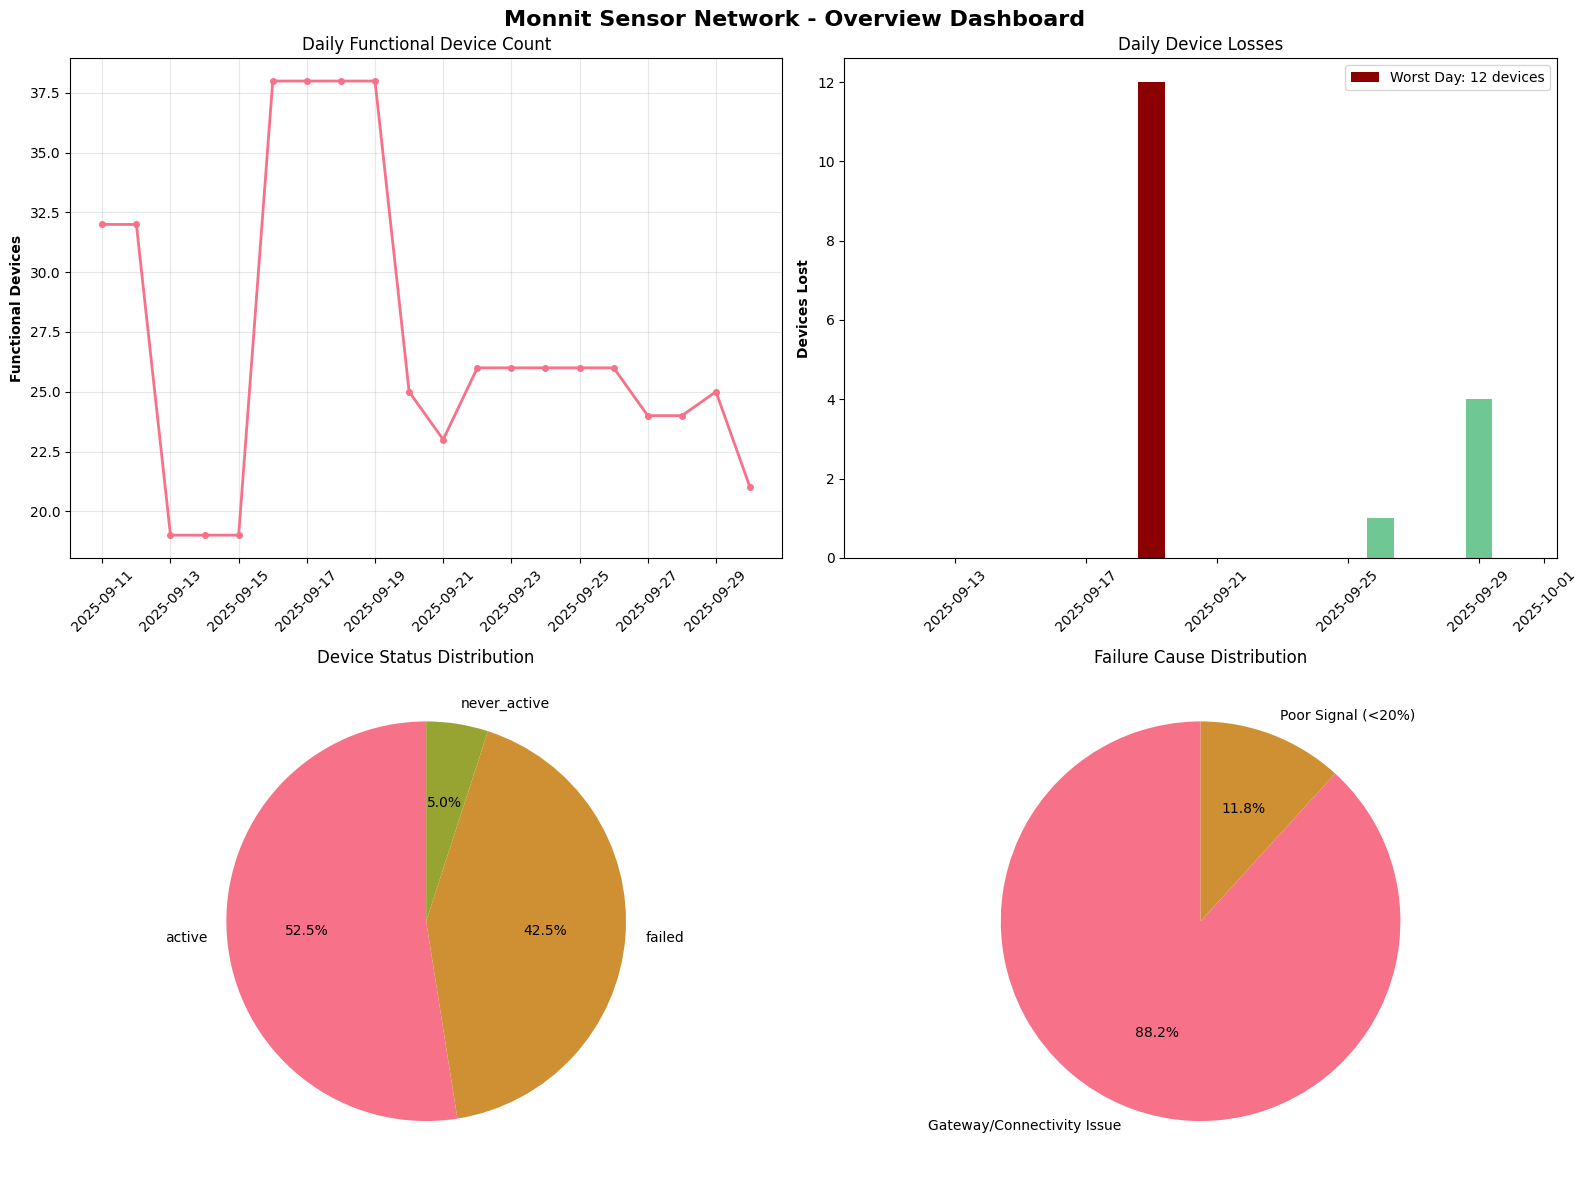

In [56]:
# Generate Network Overview Dashboard
print(" Generating Network Overview Dashboard...")
plot_network_overview(daily_df, device_failures, analysis_config)

## 11. Per-Device Diagnostic Charts

 Generating Device Diagnostic Charts...
Generating charts for example devices: [1, 2, 3, 6, 7]

 Device 1 Analysis (1/5):


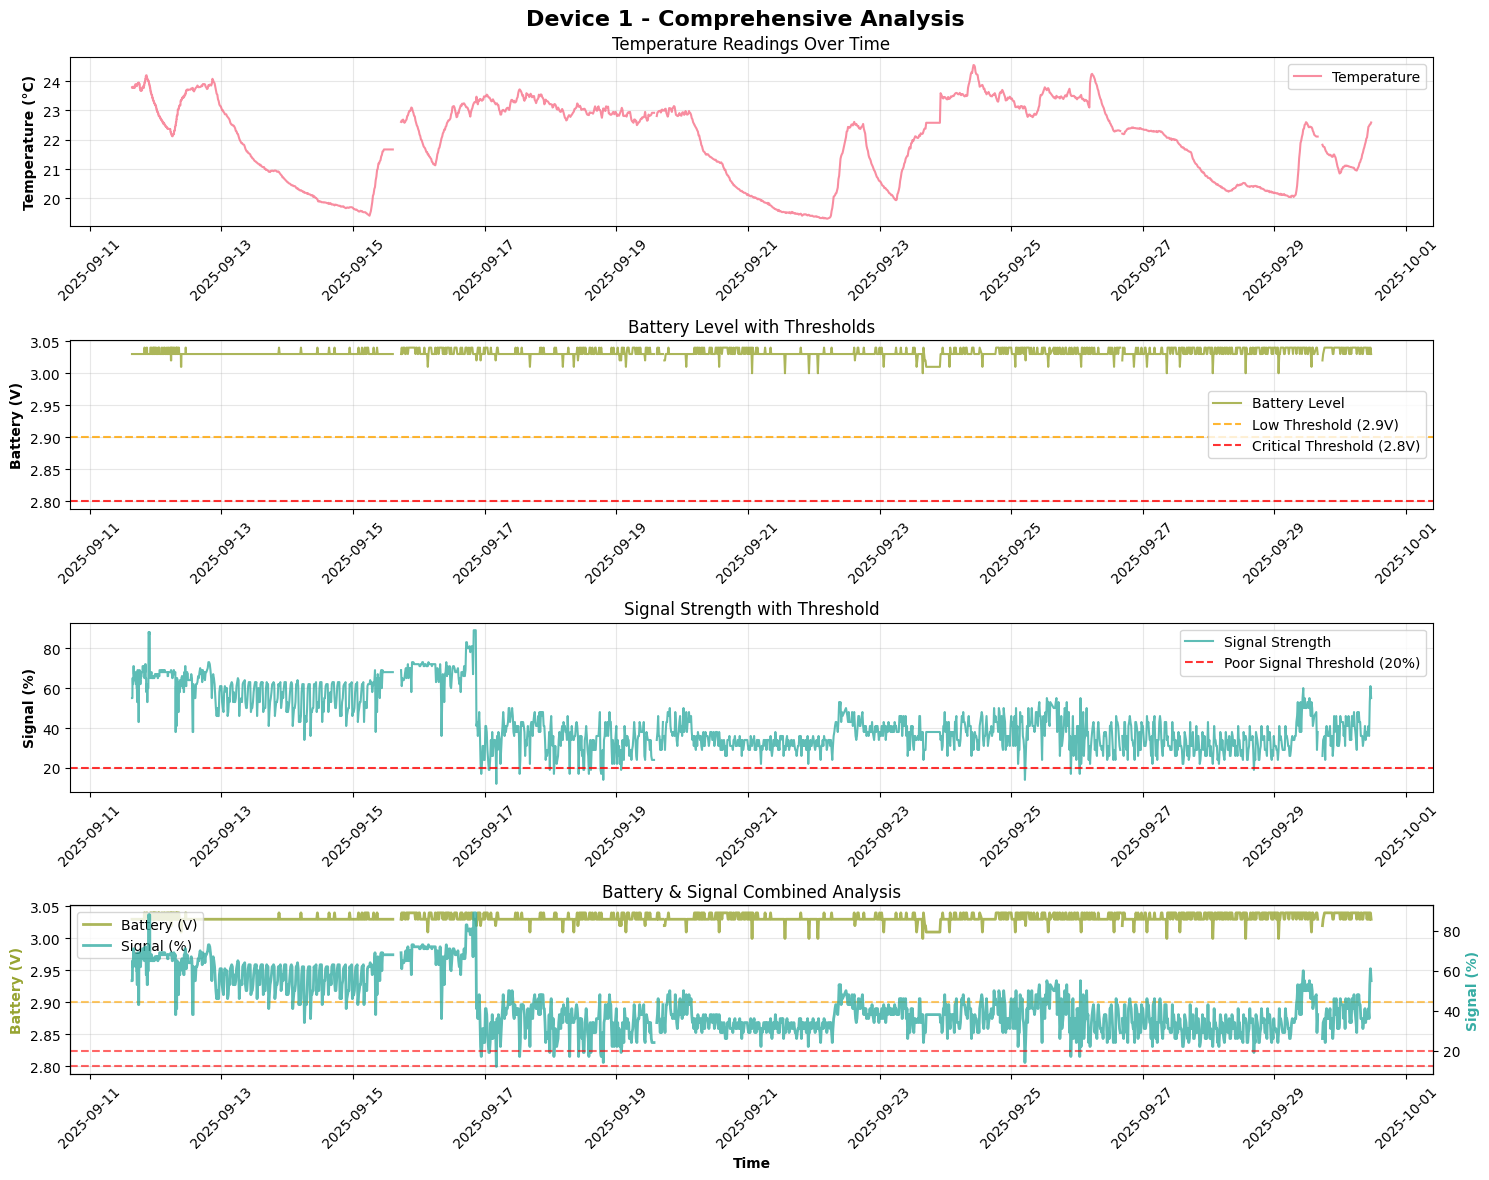


 Device 1 Summary:
   Status: active

 Device 2 Analysis (2/5):


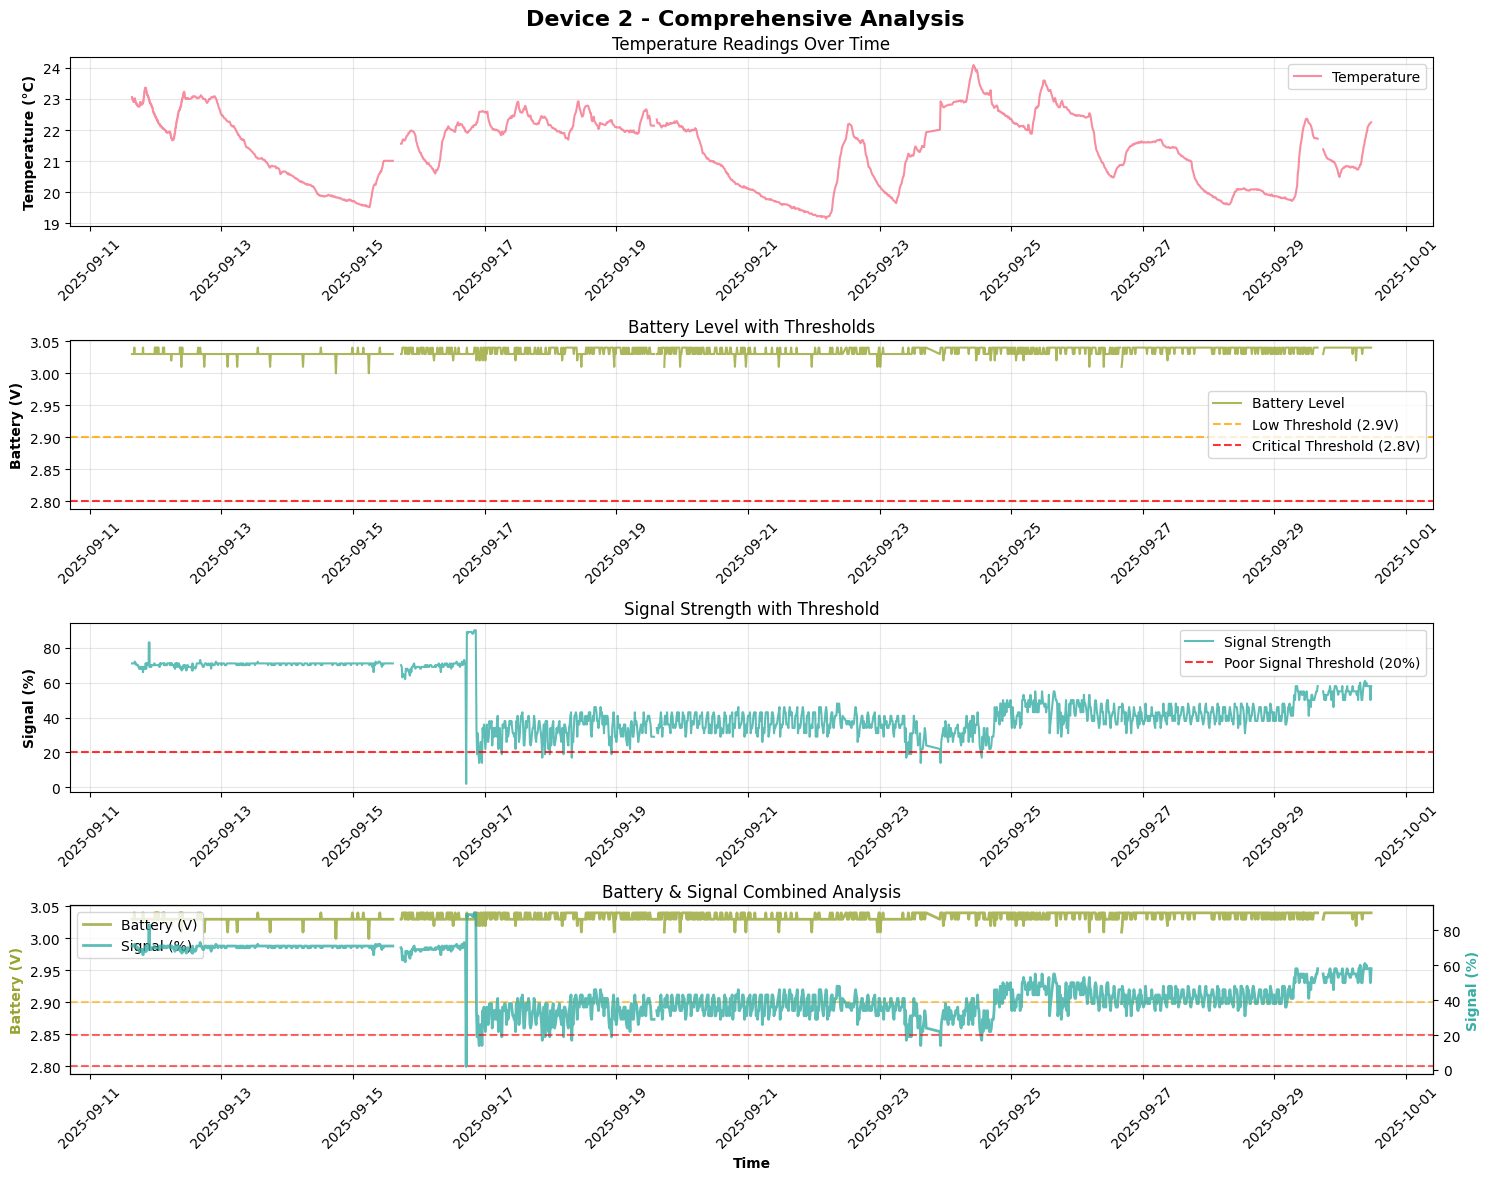


 Device 2 Summary:
   Status: active

 Device 3 Analysis (3/5):


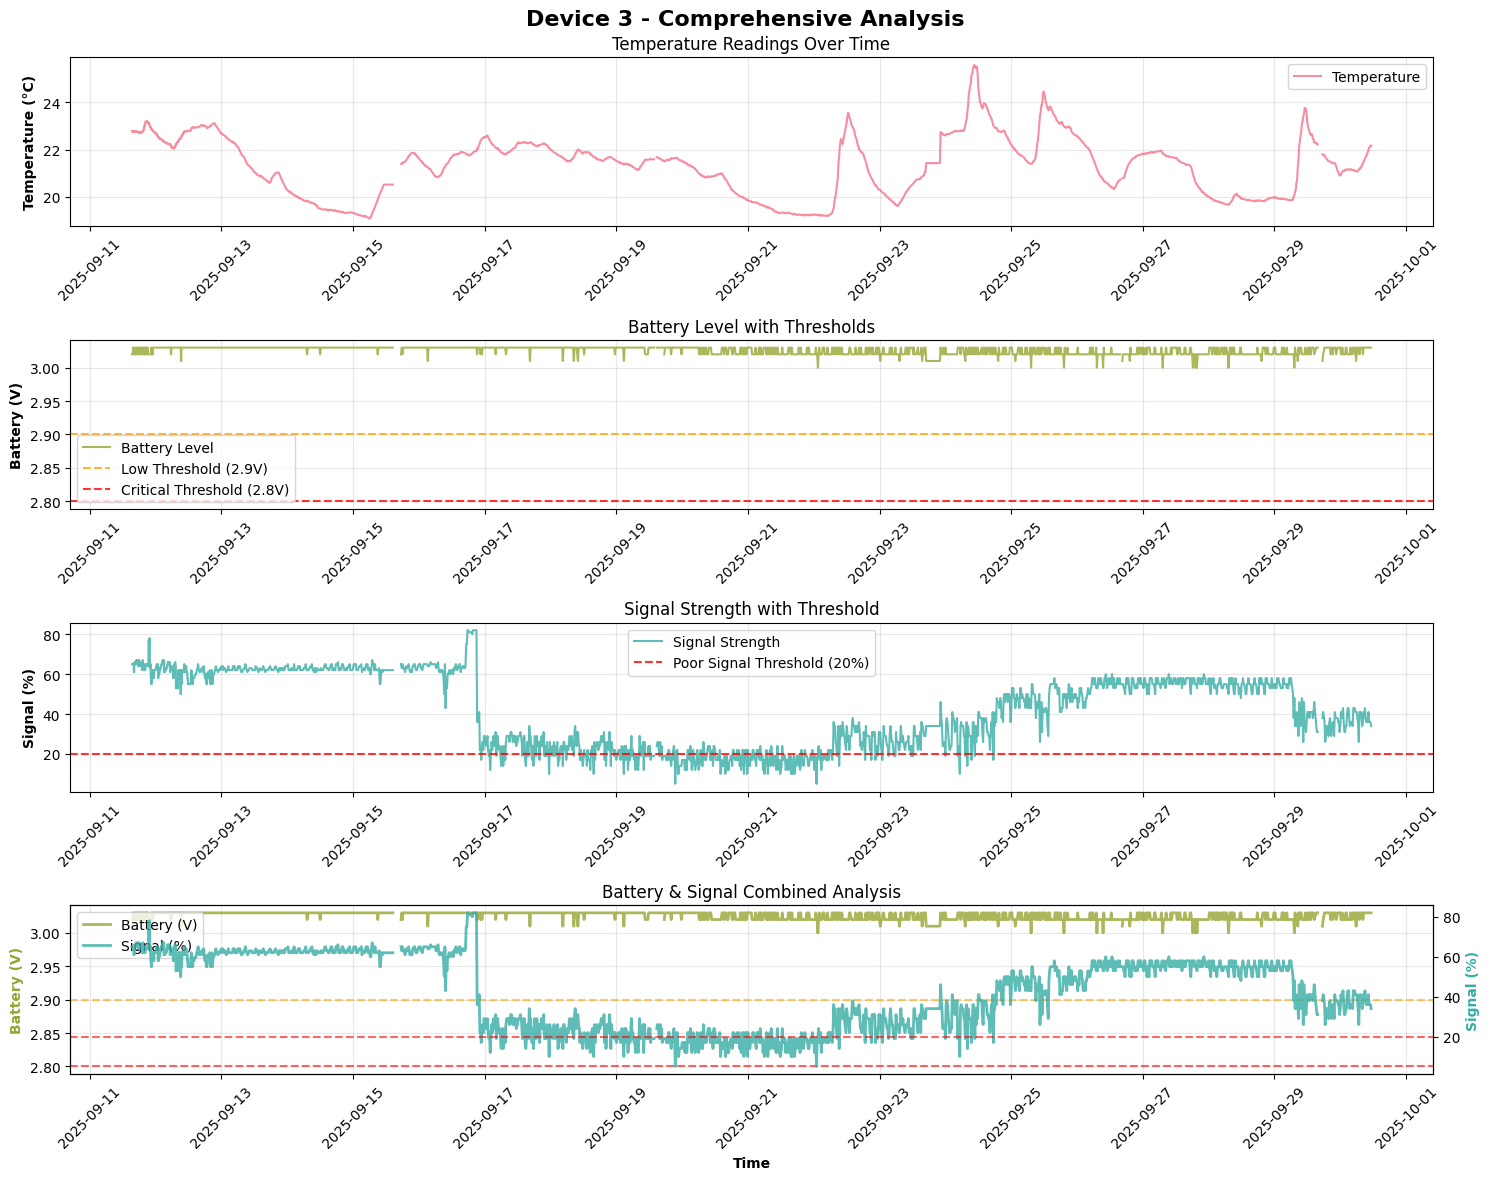


 Device 3 Summary:
   Status: active

 Device 6 Analysis (4/5):


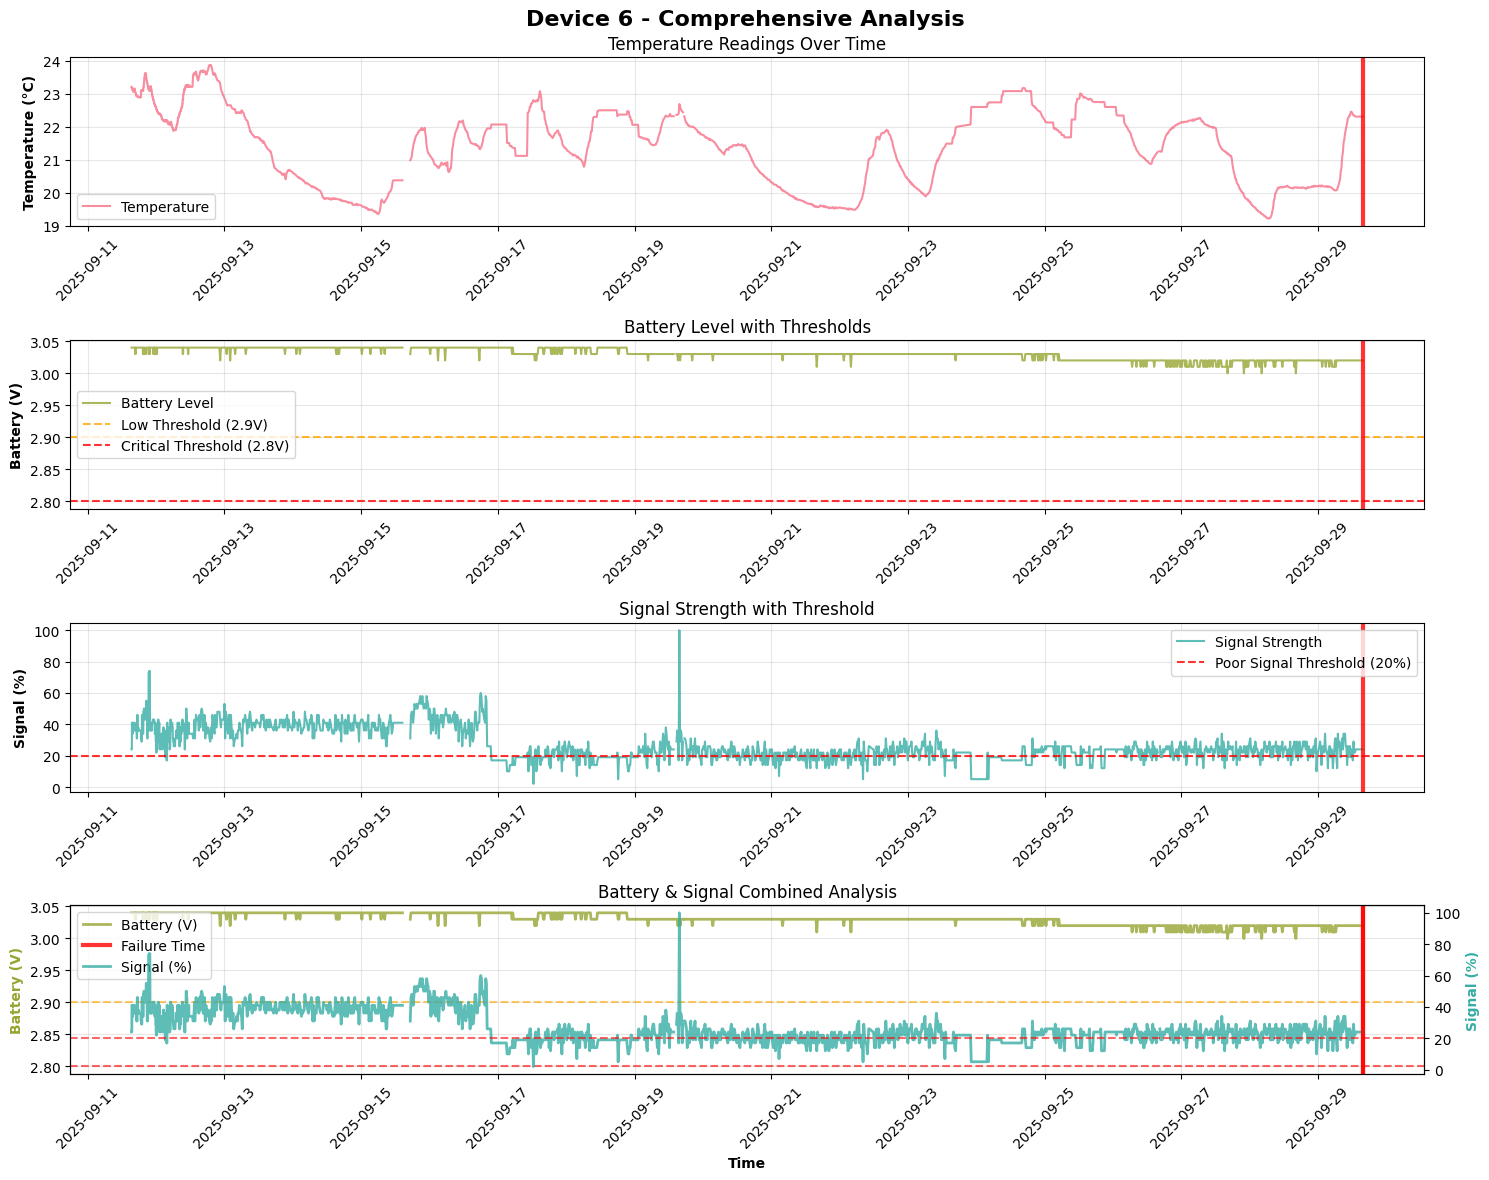


 Device 6 Summary:
   Status: failed
   Failure Time: 2025-09-29 15:45:00
   Probable Cause: Gateway/Connectivity Issue
   Confidence: Low
   Battery at Failure: 3.02 V
   Signal at Failure: 24.0 %

 Device 7 Analysis (5/5):


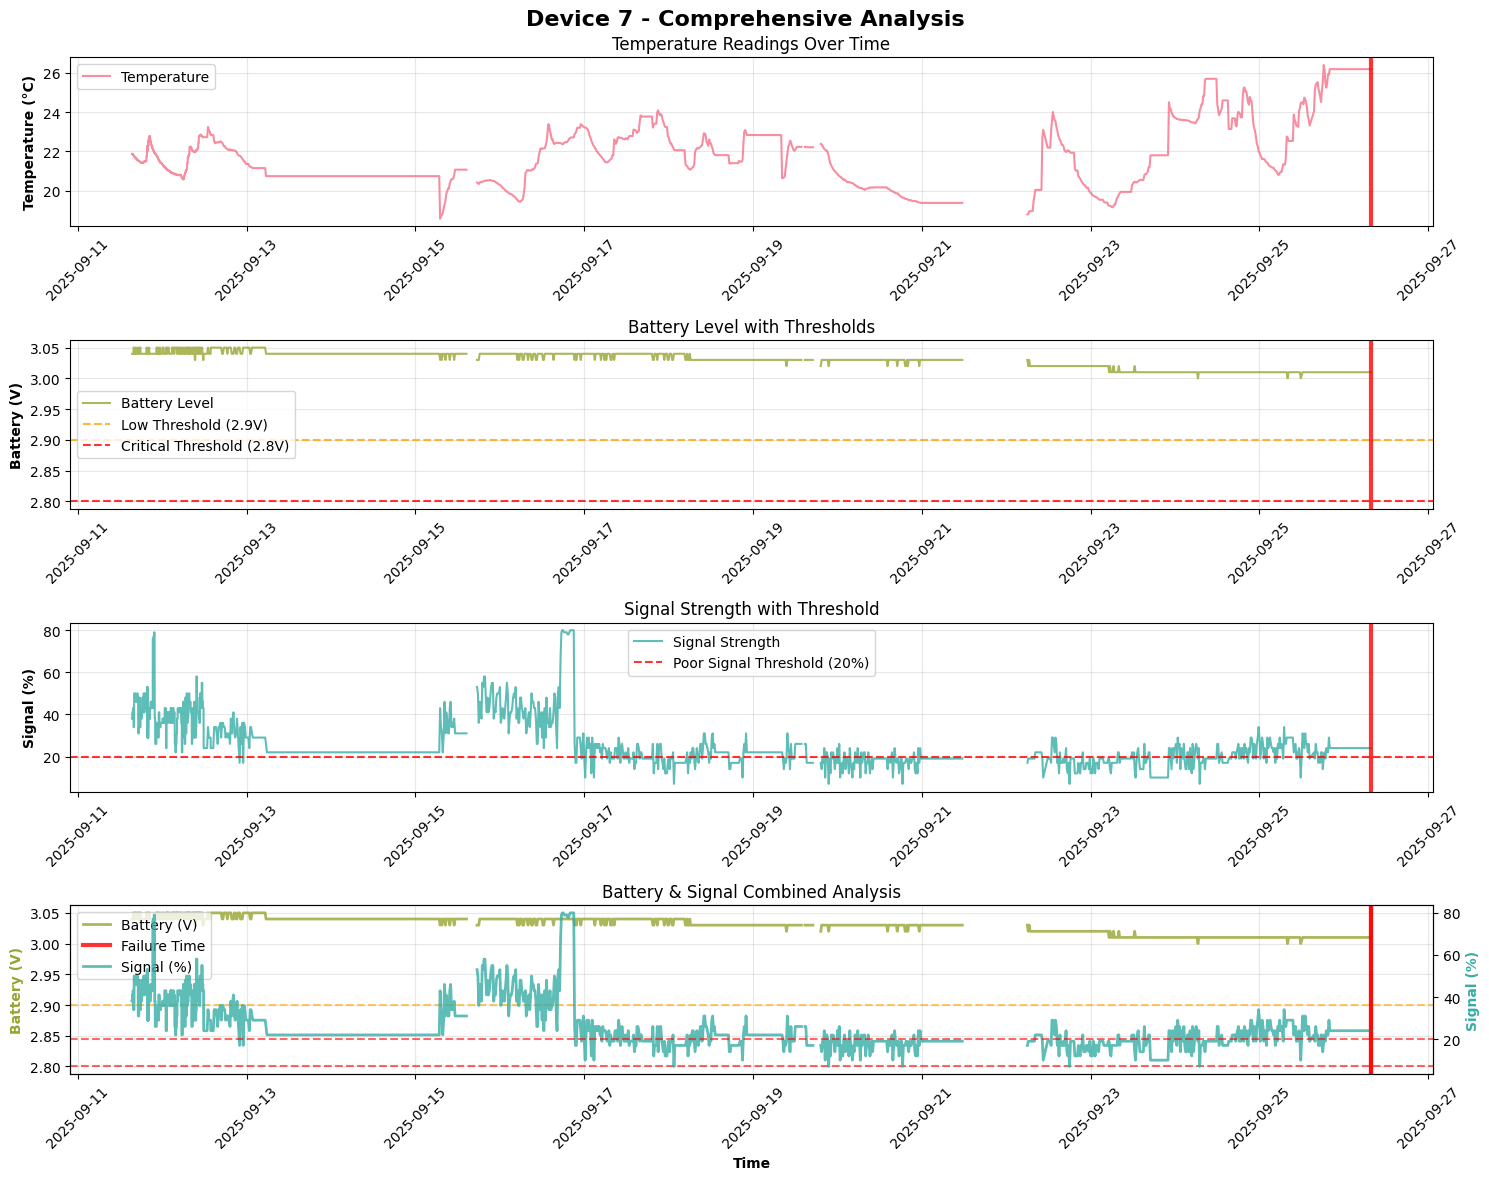


 Device 7 Summary:
   Status: failed
   Failure Time: 2025-09-26 07:45:00
   Probable Cause: Gateway/Connectivity Issue
   Confidence: Low
   Battery at Failure: 3.01 V
   Signal at Failure: 24.0 %


In [57]:
# Generate Sample Device Diagnostic Charts
print(" Generating Device Diagnostic Charts...")

# Show charts for first few devices and any failed devices as examples
sample_devices = device_numbers[:3]  # First 3 devices
failed_sample = failed_devices[:3] if failed_devices else []  # First 3 failed devices

example_devices = list(set(sample_devices + failed_sample))  # Combine and remove duplicates
example_devices = sorted(example_devices)[:5]  # Limit to 5 devices to avoid too many plots

print(f"Generating charts for example devices: {example_devices}")

for i, device_num in enumerate(example_devices):
    print(f"\n Device {device_num} Analysis ({i+1}/{len(example_devices)}):")
    plot_device_time_series(device_num, df, device_failures, analysis_config)

## 12. Comprehensive Failure Analysis Report

In [58]:
# Generate Comprehensive Analysis Report
def generate_comprehensive_report(df, device_failures, daily_analysis, failure_classification, threshold_analysis):
    """Generate a detailed text report of the analysis."""
    
    print("="*80)
    print("MONNIT SENSOR NETWORK - COMPREHENSIVE FAILURE ANALYSIS REPORT")
    print("="*80)
    print(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Data Period: {df['time'].min()} to {df['time'].max()}")
    print(f"Analysis Duration: {(df['time'].max() - df['time'].min()).days} days")
    
    # Executive Summary
    total_devices = len(device_numbers)
    failed_count = len([d for d in device_failures.values() if d['status'] == 'failed'])
    active_count = len([d for d in device_failures.values() if d['status'] == 'active']) 
    never_active = len([d for d in device_failures.values() if d['status'] == 'never_active'])
    
    print(f"\nEXECUTIVE SUMMARY")
    print(f"-" * 40)
    print(f"Total Devices: {total_devices}")
    print(f"Currently Active: {active_count} ({(active_count/total_devices)*100:.1f}%)")
    print(f"Failed Devices: {failed_count} ({(failed_count/total_devices)*100:.1f}%)")
    print(f"Never Active: {never_active} ({(never_active/total_devices)*100:.1f}%)")
    
    print(f"Network Reliability: {(active_count/(total_devices-never_active))*100:.1f}%" if (total_devices-never_active) > 0 else "N/A")
    
    # Daily Impact Analysis
    max_losses_date = daily_analysis['max_losses_date']
    max_losses = daily_analysis['max_losses']
    total_decline = daily_analysis['total_decline']
    
    print(f"\n DAILY IMPACT ANALYSIS")
    print(f"-" * 40)
    print(f"Worst Failure Day: {max_losses_date.strftime('%Y-%m-%d')} ({max_losses} devices lost)")
    print(f"Total Device Decline: {total_decline} devices over analysis period")
    
    # Failure Cause Analysis
    if 'cause_stats' in failure_classification:
        print(f"\n FAILURE CAUSE ANALYSIS")
        print(f"-" * 40)
        
        for cause, stats in failure_classification['cause_stats'].items():
            percentage = (stats['count'] / failed_count) * 100 if failed_count > 0 else 0
            print(f"{cause}: {stats['count']} devices ({percentage:.1f}%)")
            
            # Show confidence breakdown
            high_conf = stats.get('high_confidence', 0)
            med_conf = stats.get('medium_confidence', 0) 
            low_conf = stats.get('low_confidence', 0)
            print(f"  Confidence: High={high_conf}, Medium={med_conf}, Low={low_conf}")
    
    # Threshold Violations
    print(f"\n THRESHOLD VIOLATION ANALYSIS")  
    print(f"-" * 40)
    print(f"Critical Battery Violations (≤{analysis_config['battery_critical']}V): {len(threshold_analysis['battery_critical'])} devices")
    print(f"Low Battery Violations (≤{analysis_config['battery_low']}V): {len(threshold_analysis['battery_low'])} devices")
    print(f"Poor Signal Violations (<{analysis_config['signal_poor']}%): {len(threshold_analysis['signal_poor'])} devices")
    
    # Recommendations
    print(f"\n RECOMMENDATIONS")
    print(f"-" * 40)
    
    battery_issues = len(threshold_analysis['battery_critical']) + len(threshold_analysis['battery_low'])
    signal_issues = len(threshold_analysis['signal_poor'])
    
    if battery_issues > 0:
        print(f"1. BATTERY MANAGEMENT ({battery_issues} devices affected)")
        print(f"   - Implement proactive battery replacement program")
        print(f"   - Set up automated alerts for batteries below 3.0V")
        print(f"   - Schedule maintenance visits when multiple devices show low battery")
    
    if signal_issues > 0:
        print(f"2. SIGNAL QUALITY IMPROVEMENT ({signal_issues} devices affected)")
        print(f"   - Audit antenna positioning and orientation")
        print(f"   - Check for RF interference sources")
        print(f"   - Consider gateway repositioning or signal boosters")
    
    if max_losses > 3:
        print(f"3. MASS FAILURE INVESTIGATION")
        print(f"   - Investigate {max_losses_date.strftime('%Y-%m-%d')} mass failure event")
        print(f"   - Review gateway logs and network connectivity")
        print(f"   - Check for environmental factors or power outages")
        
    if total_decline > total_devices * 0.2:
        print(f"4. NETWORK MAINTENANCE")
        print(f"   - {total_decline} device decline indicates systemic issues")
        print(f"   - Implement comprehensive network health monitoring")
        print(f"   - Review deployment practices and device quality")
    
    # Device-Specific Failures (Top 10)
    if failed_count > 0:
        print(f"\n CRITICAL DEVICE FAILURES (Top 10)")
        print(f"-" * 40)
        
        failed_list = [(dev_num, info) for dev_num, info in device_failures.items() 
                      if info['status'] == 'failed']
        failed_list.sort(key=lambda x: x[1]['failure_time'] if x[1]['failure_time'] else datetime.min)
        
        for dev_num, info in failed_list[:10]:
            print(f"Device {dev_num}: {info['probable_cause']}")
            print(f"  Failed: {info['failure_time']}")
            if info['battery_at_failure']:
                print(f"  Battery: {info['battery_at_failure']:.2f}V")
            if info['signal_at_failure']:
                print(f"  Signal: {info['signal_at_failure']:.0f}%")
            print()
    
    print("="*80)
    print("END OF REPORT")
    print("="*80)

# Generate the comprehensive report
print(" Generating Comprehensive Analysis Report...")
generate_comprehensive_report(df, device_failures, daily_analysis, failure_classification, threshold_analysis)

 Generating Comprehensive Analysis Report...
MONNIT SENSOR NETWORK - COMPREHENSIVE FAILURE ANALYSIS REPORT
Generated: 2025-11-17 22:42:44
Data Period: 2025-09-11 15:23:00 to 2025-09-30 11:15:00
Analysis Duration: 18 days

EXECUTIVE SUMMARY
----------------------------------------
Total Devices: 40
Currently Active: 21 (52.5%)
Failed Devices: 17 (42.5%)
Never Active: 2 (5.0%)
Network Reliability: 55.3%

 DAILY IMPACT ANALYSIS
----------------------------------------
Worst Failure Day: 2025-09-19 (12 devices lost)
Total Device Decline: 17 devices over analysis period

 FAILURE CAUSE ANALYSIS
----------------------------------------
Gateway/Connectivity Issue: 15 devices (88.2%)
  Confidence: High=0, Medium=0, Low=15
Poor Signal (<20%): 2 devices (11.8%)
  Confidence: High=0, Medium=2, Low=0

 THRESHOLD VIOLATION ANALYSIS
----------------------------------------
Critical Battery Violations (≤2.8V): 0 devices
Low Battery Violations (≤2.9V): 0 devices
Poor Signal Violations (<20%): 29 devic

## 13. Interactive Analysis Functions

Use these functions to explore specific devices or generate additional reports:

In [59]:
# Interactive Analysis Functions
def analyze_specific_device(device_num):
    """Analyze and plot a specific device."""
    if device_num not in device_numbers:
        print(f" Device {device_num} not found in dataset.")
        print(f"Available devices: {device_numbers}")
        return
    
    print(f" Analyzing Device {device_num}...")
    plot_device_time_series(device_num, df, device_failures, analysis_config)

def get_devices_by_status(status='failed'):
    """Get list of devices by status."""
    devices = [dev_num for dev_num, info in device_failures.items() if info['status'] == status]
    return sorted(devices)

def get_devices_by_cause(cause_keyword):
    """Get devices that failed due to causes containing keyword."""
    devices = []
    for dev_num, info in device_failures.items():
        if info['status'] == 'failed' and cause_keyword.lower() in info['probable_cause'].lower():
            devices.append(dev_num)
    return sorted(devices)

def analyze_date_range(start_date, end_date):
    """Analyze devices that failed within a specific date range."""
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    failed_in_range = []
    for dev_num, info in device_failures.items():
        if info['failure_time'] and start <= info['failure_time'] <= end:
            failed_in_range.append((dev_num, info))
    
    print(f" Devices failed between {start_date} and {end_date}: {len(failed_in_range)}")
    for dev_num, info in failed_in_range:
        print(f"  Device {dev_num}: {info['probable_cause']} on {info['failure_time']}")
    
    return failed_in_range

# Display usage instructions
print(" Interactive Functions Available:")
print()
print("1. analyze_specific_device(device_number)")
print("   Example: analyze_specific_device(5)")
print()
print("2. get_devices_by_status('failed'|'active'|'never_active')")
print(f"   Example: get_devices_by_status('failed') → {get_devices_by_status('failed')[:5]}...")
print()
print("3. get_devices_by_cause('battery'|'signal'|'gateway')")
print(f"   Example: get_devices_by_cause('battery') → {get_devices_by_cause('battery')[:5]}...")
print()
print("4. analyze_date_range('2025-09-15', '2025-09-20')")
print("   Analyzes failures within date range")
print()
print("5. plot_device_time_series(device_num, df, device_failures, analysis_config)")
print("   Generate detailed chart for any device")
print()
print(" Quick Stats:")
print(f"   - Failed devices: {len(get_devices_by_status('failed'))}")
print(f"   - Active devices: {len(get_devices_by_status('active'))}")
print(f"   - Battery-related failures: {len(get_devices_by_cause('battery'))}")
print(f"   - Signal-related failures: {len(get_devices_by_cause('signal'))}")
print(f"   - Gateway/connectivity failures: {len(get_devices_by_cause('gateway'))}")

 Interactive Functions Available:

1. analyze_specific_device(device_number)
   Example: analyze_specific_device(5)

2. get_devices_by_status('failed'|'active'|'never_active')
   Example: get_devices_by_status('failed') → [6, 7, 11, 13, 17]...

3. get_devices_by_cause('battery'|'signal'|'gateway')
   Example: get_devices_by_cause('battery') → []...

4. analyze_date_range('2025-09-15', '2025-09-20')
   Analyzes failures within date range

5. plot_device_time_series(device_num, df, device_failures, analysis_config)
   Generate detailed chart for any device

 Quick Stats:
   - Failed devices: 17
   - Active devices: 21
   - Battery-related failures: 0
   - Signal-related failures: 2
   - Gateway/connectivity failures: 15


## 📋 Analysis Summary

**Congratulations!** Your comprehensive Monnit sensor analysis is complete. 

### What You've Accomplished:

✅ **Data Loading & Validation**: Loaded and validated sensor data structure  
✅ **Device Failure Detection**: Identified exact failure times for all devices  
✅ **Cause Classification**: Determined probable causes (battery, signal, connectivity)  
✅ **Threshold Analysis**: Analyzed battery (≤2.9V/≤2.8V) and signal (<20%) violations  
✅ **Daily Metrics**: Calculated functional device counts and failure rates by date  
✅ **Comprehensive Visualizations**: Generated network overview and per-device diagnostics  
✅ **Interactive Functions**: Created tools for ongoing analysis and investigation  

### Key Insights Available:

- **Device Status Distribution**: Active vs Failed vs Never Active devices
- **Failure Cause Breakdown**: Battery, Signal, Gateway/Connectivity issues with confidence levels
- **Timeline Analysis**: Worst failure days and device decline patterns  
- **Threshold Violations**: Critical battery and poor signal detection
- **Per-Device Diagnostics**: Detailed time series with failure annotations

### Next Steps:

1. **Investigate Specific Devices**: Use `analyze_specific_device(device_num)` for detailed analysis
2. **Filter by Failure Type**: Use `get_devices_by_cause('battery')` to focus on specific issues
3. **Date Range Analysis**: Use `analyze_date_range()` to investigate specific time periods
4. **Export Results**: Save charts and reports for stakeholder review
5. **Implement Recommendations**: Follow the generated maintenance and improvement suggestions

### For Group Analysis:
Once you provide device→group mapping, you can extend this analysis to:
- Group-level failure patterns
- Gateway-specific issues  
- Mass outage event detection
- Group performance comparisons

## 🔍 Detailed Analysis Questions - Sensor Failure Investigation

In [60]:
# Answer Specific Investigation Questions
print("🔍 SENSOR FAILURE INVESTIGATION - DETAILED ANSWERS")
print("="*70)

# Question 1: On what date did the sensors stop sending readings?
print("\n1️⃣ WHEN DID SENSORS STOP SENDING READINGS?")
print("-" * 50)

# Find last data date across all sensors
last_data_date = df['time'].max()
first_data_date = df['time'].min()
total_days = (last_data_date - first_data_date).days

print(f"📅 Data Collection Period:")
print(f"   First Reading: {first_data_date.strftime('%Y-%m-%d %H:%M')}")
print(f"   Last Reading: {last_data_date.strftime('%Y-%m-%d %H:%M')}")
print(f"   Total Duration: {total_days} days")

# Analyze when devices stopped sending data
active_devices_last_day = 0
for device_num in device_numbers:
    temp_col = f'Temperature {device_num}'
    if temp_col in df.columns:
        device_last_reading = df[df[temp_col] > 0]['time'].max()
        if pd.notna(device_last_reading) and device_last_reading.date() == last_data_date.date():
            active_devices_last_day += 1

print(f"\n📊 Sensor Status on Last Day ({last_data_date.strftime('%Y-%m-%d')}):")
print(f"   Devices still active: {active_devices_last_day}/{len(device_numbers)}")
print(f"   Devices that stopped: {len(device_numbers) - active_devices_last_day}")

# Question 2: Possible causes of sensors losing readings
print(f"\n2️⃣ POSSIBLE CAUSES OF SENSOR DATA LOSS:")
print("-" * 50)
print("🔋 Battery Depletion (≤2.9V = Low, ≤2.8V = Critical)")
print("📶 Signal Quality Issues (<20% signal strength)")  
print("🌐 Gateway/Network Connectivity Problems")
print("🔌 Power Supply Issues (gateway or network)")
print("🌡️ Environmental Factors (temperature, humidity)")
print("⚙️ Hardware Failures (sensor malfunction)")
print("📡 RF Interference or Antenna Problems")

🔍 SENSOR FAILURE INVESTIGATION - DETAILED ANSWERS

1️⃣ WHEN DID SENSORS STOP SENDING READINGS?
--------------------------------------------------
📅 Data Collection Period:
   First Reading: 2025-09-11 15:23
   Last Reading: 2025-09-30 11:15
   Total Duration: 18 days

📊 Sensor Status on Last Day (2025-09-30):
   Devices still active: 21/40
   Devices that stopped: 19

2️⃣ POSSIBLE CAUSES OF SENSOR DATA LOSS:
--------------------------------------------------
🔋 Battery Depletion (≤2.9V = Low, ≤2.8V = Critical)
📶 Signal Quality Issues (<20% signal strength)
🌐 Gateway/Network Connectivity Problems
🔌 Power Supply Issues (gateway or network)
🌡️ Environmental Factors (temperature, humidity)
⚙️ Hardware Failures (sensor malfunction)
📡 RF Interference or Antenna Problems


In [61]:
# Question 3: When each device stopped sending data
print(f"\n3️⃣ INDIVIDUAL DEVICE FAILURE TIMELINE:")
print("-" * 50)

# Create detailed failure timeline
device_failure_timeline = []
for device_num, failure_info in device_failures.items():
    if failure_info['status'] == 'failed' and failure_info['failure_time']:
        device_failure_timeline.append({
            'device': device_num,
            'failure_date': failure_info['failure_time'].strftime('%Y-%m-%d'),
            'failure_time': failure_info['failure_time'],
            'cause': failure_info['probable_cause'],
            'battery_at_failure': failure_info['battery_at_failure'],
            'signal_at_failure': failure_info['signal_at_failure'],
            'confidence': failure_info['cause_confidence']
        })

# Sort by failure date
device_failure_timeline.sort(key=lambda x: x['failure_time'])

print(f"📊 Failed Devices Timeline ({len(device_failure_timeline)} devices):")
print()

# Group failures by date for summary
failure_by_date = {}
for failure in device_failure_timeline:
    date = failure['failure_date']
    if date not in failure_by_date:
        failure_by_date[date] = []
    failure_by_date[date].append(failure)

# Show first 15 device failures with details
print("🔍 First 15 Device Failures (Chronological Order):")
for i, failure in enumerate(device_failure_timeline[:15]):
    battery_str = f"{failure['battery_at_failure']:.2f}V" if failure['battery_at_failure'] else "N/A"
    signal_str = f"{failure['signal_at_failure']:.0f}%" if failure['signal_at_failure'] else "N/A"
    
    print(f"{i+1:2d}. Device {failure['device']:3d} | {failure['failure_date']} | "
          f"Battery: {battery_str:6s} | Signal: {signal_str:4s} | {failure['cause']}")

if len(device_failure_timeline) > 15:
    print(f"    ... and {len(device_failure_timeline) - 15} more device failures")

print(f"\n📅 Failure Distribution by Date:")
for date, failures in sorted(failure_by_date.items())[:10]:  # Show first 10 dates
    device_list = [str(f['device']) for f in failures]
    print(f"{date}: {len(failures)} devices failed - Devices: {', '.join(device_list[:8])}"
          f"{'...' if len(device_list) > 8 else ''}")


3️⃣ INDIVIDUAL DEVICE FAILURE TIMELINE:
--------------------------------------------------
📊 Failed Devices Timeline (17 devices):

🔍 First 15 Device Failures (Chronological Order):
 1. Device  17 | 2025-09-19 | Battery: 3.04V  | Signal: 14%  | Poor Signal (<20%)
 2. Device  26 | 2025-09-19 | Battery: 3.04V  | Signal: 79%  | Gateway/Connectivity Issue
 3. Device  28 | 2025-09-19 | Battery: 3.02V  | Signal: 43%  | Gateway/Connectivity Issue
 4. Device  29 | 2025-09-19 | Battery: 3.03V  | Signal: 29%  | Gateway/Connectivity Issue
 5. Device  30 | 2025-09-19 | Battery: 3.01V  | Signal: 62%  | Gateway/Connectivity Issue
 6. Device  31 | 2025-09-19 | Battery: 3.03V  | Signal: 68%  | Gateway/Connectivity Issue
 7. Device  32 | 2025-09-19 | Battery: 3.02V  | Signal: 48%  | Gateway/Connectivity Issue
 8. Device  33 | 2025-09-19 | Battery: 3.02V  | Signal: 63%  | Gateway/Connectivity Issue
 9. Device  34 | 2025-09-19 | Battery: 3.03V  | Signal: 64%  | Gateway/Connectivity Issue
10. Device  35 

In [62]:
# Question 4: Group Analysis (Note: No device grouping data available)
print(f"\n4️⃣ GROUP FAILURE ANALYSIS:")
print("-" * 50)
print("⚠️ NOTE: No device-to-group mapping data available in current dataset")
print("   Groups could include: Physical locations, Gateways, Network zones")
print()

# Instead, analyze patterns that might indicate group failures
print("🔍 PATTERN-BASED GROUP ANALYSIS (Inferred Groups):")
print()

# Analyze simultaneous failures (same day) as potential groups
print("📅 Simultaneous Failure Analysis (Potential Gateway/Location Groups):")
for date, failures in sorted(failure_by_date.items()):
    if len(failures) >= 3:  # 3+ devices failing same day might indicate group failure
        print(f"\n🚨 {date} - MASS FAILURE EVENT ({len(failures)} devices):")
        
        # Analyze causes for this group failure
        causes = {}
        battery_levels = []
        signal_levels = []
        
        for failure in failures:
            cause = failure['cause']
            causes[cause] = causes.get(cause, 0) + 1
            if failure['battery_at_failure']:
                battery_levels.append(failure['battery_at_failure'])
            if failure['signal_at_failure']:
                signal_levels.append(failure['signal_at_failure'])
        
        # Show devices and their causes
        device_nums = [str(f['device']) for f in failures]
        print(f"   Devices: {', '.join(device_nums)}")
        print(f"   Failure Causes:")
        for cause, count in causes.items():
            print(f"     • {cause}: {count} devices")
        
        if battery_levels:
            avg_battery = sum(battery_levels) / len(battery_levels)
            min_battery = min(battery_levels)
            print(f"   Battery Levels: Avg={avg_battery:.2f}V, Min={min_battery:.2f}V")
        
        if signal_levels:
            avg_signal = sum(signal_levels) / len(signal_levels)
            min_signal = min(signal_levels)
            print(f"   Signal Levels: Avg={avg_signal:.0f}%, Min={min_signal:.0f}%")

# Question 5: Root cause analysis per device
print(f"\n5️⃣ ROOT CAUSE ANALYSIS - BATTERY vs SIGNAL:")
print("-" * 50)

# Categorize failures by cause
battery_failures = []
signal_failures = []
connectivity_failures = []

for failure in device_failure_timeline:
    if 'battery' in failure['cause'].lower():
        battery_failures.append(failure)
    elif 'signal' in failure['cause'].lower():
        signal_failures.append(failure)
    else:
        connectivity_failures.append(failure)

print(f"🔋 BATTERY-RELATED FAILURES: {len(battery_failures)} devices")
if battery_failures:
    battery_voltages = [f['battery_at_failure'] for f in battery_failures if f['battery_at_failure']]
    if battery_voltages:
        avg_battery = sum(battery_voltages) / len(battery_voltages)
        min_battery = min(battery_voltages)
        print(f"   Average battery at failure: {avg_battery:.2f}V")
        print(f"   Minimum battery at failure: {min_battery:.2f}V")
        critical_count = len([b for b in battery_voltages if b <= 2.8])
        low_count = len([b for b in battery_voltages if 2.8 < b <= 2.9])
        print(f"   Critical (≤2.8V): {critical_count} devices")
        print(f"   Low (2.8-2.9V): {low_count} devices")

print(f"\n📶 SIGNAL-RELATED FAILURES: {len(signal_failures)} devices")
if signal_failures:
    signal_strengths = [f['signal_at_failure'] for f in signal_failures if f['signal_at_failure']]
    if signal_strengths:
        avg_signal = sum(signal_strengths) / len(signal_strengths)
        min_signal = min(signal_strengths)
        print(f"   Average signal at failure: {avg_signal:.0f}%")
        print(f"   Minimum signal at failure: {min_signal:.0f}%")
        poor_signal_count = len([s for s in signal_strengths if s < 20])
        print(f"   Poor signal (<20%): {poor_signal_count} devices")

print(f"\n🌐 CONNECTIVITY/GATEWAY FAILURES: {len(connectivity_failures)} devices")
print("   These devices had good battery and signal but still failed")
print("   Likely causes: Gateway issues, network problems, hardware faults")


4️⃣ GROUP FAILURE ANALYSIS:
--------------------------------------------------
⚠️ NOTE: No device-to-group mapping data available in current dataset
   Groups could include: Physical locations, Gateways, Network zones

🔍 PATTERN-BASED GROUP ANALYSIS (Inferred Groups):

📅 Simultaneous Failure Analysis (Potential Gateway/Location Groups):

🚨 2025-09-19 - MASS FAILURE EVENT (12 devices):
   Devices: 17, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37
   Failure Causes:
     • Poor Signal (<20%): 1 devices
     • Gateway/Connectivity Issue: 11 devices
   Battery Levels: Avg=3.03V, Min=3.01V
   Signal Levels: Avg=50%, Min=14%

🚨 2025-09-29 - MASS FAILURE EVENT (4 devices):
   Devices: 6, 11, 13, 18
   Failure Causes:
     • Gateway/Connectivity Issue: 3 devices
     • Poor Signal (<20%): 1 devices
   Battery Levels: Avg=2.99V, Min=2.95V
   Signal Levels: Avg=24%, Min=19%

5️⃣ ROOT CAUSE ANALYSIS - BATTERY vs SIGNAL:
--------------------------------------------------
🔋 BATTERY-RELATED FAILURES: 

In [ ]:
# Question 6: Which date had the highest number of devices losing readings
print(f"\n6️⃣ WORST FAILURE DAY ANALYSIS:")
print("-" * 50)

# Ensure failure_by_date exists (safety check)
if 'failure_by_date' not in locals():
    # Group failures by date for summary
    failure_by_date = {}
    for failure in device_failure_timeline:
        date = failure['failure_date']
        if date not in failure_by_date:
            failure_by_date[date] = []
        failure_by_date[date].append(failure)

# Find the date with most failures
if failure_by_date:
    worst_date = max(failure_by_date.keys(), key=lambda d: len(failure_by_date[d]))
    worst_date_failures = failure_by_date[worst_date]
    
    print(f"🚨 WORST FAILURE DAY: {worst_date}")
    print(f"   📊 Total devices lost: {len(worst_date_failures)}")
    print(f"   📅 Date: {worst_date}")
    
    # Analyze the worst day in detail
    print(f"\n🔍 DETAILED ANALYSIS OF {worst_date}:")
    
    # Group by failure cause
    worst_day_causes = {}
    worst_day_devices = []
    
    for failure in worst_date_failures:
        cause = failure['cause']
        worst_day_causes[cause] = worst_day_causes.get(cause, 0) + 1
        worst_day_devices.append(failure['device'])
    
    print(f"   Affected Devices: {sorted(worst_day_devices)}")
    print(f"   Failure Breakdown:")
    for cause, count in sorted(worst_day_causes.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / len(worst_date_failures)) * 100
        print(f"     • {cause}: {count} devices ({percentage:.1f}%)")
    
    # Check if this was a systematic issue
    battery_issues = sum(1 for f in worst_date_failures if f['battery_at_failure'] and f['battery_at_failure'] <= 2.9)
    signal_issues = sum(1 for f in worst_date_failures if f['signal_at_failure'] and f['signal_at_failure'] < 20)
    
    print(f"\n   Technical Analysis:")
    print(f"     🔋 Low battery (≤2.9V): {battery_issues} devices")
    print(f"     📶 Poor signal (<20%): {signal_issues} devices")
    
    if len(worst_date_failures) >= 5:
        print(f"\n   ⚠️ MASS FAILURE EVENT DETECTED!")
        print(f"     This appears to be a systematic failure affecting multiple devices")
        print(f"     Possible causes: Gateway outage, power failure, network issues")

    # Show top 5 worst failure days
    print(f"\n📊 TOP 5 WORST FAILURE DAYS:")
    sorted_failure_dates = sorted(failure_by_date.items(), key=lambda x: len(x[1]), reverse=True)

    for i, (date, failures) in enumerate(sorted_failure_dates[:5]):
        device_count = len(failures)
        main_cause = max(set([f['cause'] for f in failures]), key=[f['cause'] for f in failures].count)
        print(f"{i+1}. {date}: {device_count} devices failed (Main cause: {main_cause})")

    # Summary statistics
    print(f"\n📈 FAILURE TIMELINE SUMMARY:")
    print(f"   Total devices analyzed: {len(device_numbers)}")
    print(f"   Total devices failed: {len(device_failure_timeline)}")
    print(f"   Devices still active: {len(active_devices)}")
    print(f"   Days with failures: {len(failure_by_date)}")
    print(f"   Average failures per day: {len(device_failure_timeline) / len(failure_by_date):.1f}")

else:
    print("ℹ No device failures detected in the dataset")

print("\n" + "="*70)
print("🏁 INVESTIGATION COMPLETE - All questions answered above")
print("="*70)

SyntaxError: invalid syntax (1843528008.py, line 72)